</font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

In [1]:
filename_version='2dot13'

In [2]:
import sys
sys.path.append("/Users/pauljacob/Library/Python/3.8/lib/python/site-packages")

In [3]:
#file structure
!pip3 install cookiecutter

#general
!pip3 install --upgrade pip
!pip3 install ipython-autotime --quiet


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
%load_ext autotime

time: 282 µs (started: 2022-11-04 19:17:22 -07:00)


## Import Libraries

In [5]:
#get libraries
import pandas as pd
import os
import numpy as np
#from functools import reduce


#get visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from io import StringIO

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

#ML preprocessing
from sklearn.preprocessing import StandardScaler

#get ML functions
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import __version__ as sklearn_version
import datetime
#from sklearn.pipeline import make_pipeline

#get ML metric functions
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#get icr module and associated common functions
import in_vehicle_coupon_recommendation as icr
from in_vehicle_coupon_recommendation import p, rcp, rpp, rcr, sr, pl, pdc, save_and_return_data_frame, initialize_custom_notebook_settings

time: 1.45 s (started: 2022-11-04 19:17:22 -07:00)


In [6]:
#initialize notebook
initialize_custom_notebook_settings()

time: 2.37 ms (started: 2022-11-04 19:17:24 -07:00)


## Get In-Vehicle Coupon Recommendation Dataset

In [7]:
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'in-vehicle-coupon-recommendation.csv'))
df = df.sample(frac=1, random_state=200)
p(df)

(12684, 26)


destination passanger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

                      coupon expiration  gender     age      maritalStatus  \
11199  Carry out & Take away         2h    Male      26             Single   
1474                     Bar         1d    Male      46    Married partner   
10836  Carry out & Take away         1d    Male      21             Single   
4567                     Bar         1d  Female      26  Unmarried partner   
5658         Restaurant(<20)         2h  Female      31             Single   
11343      Restaurant(20-50)         2h  Female  50plus             Single   
9036         Restaurant(<20)         2h    Male      21             Single   
11050      Restaurant(20-50)         1d    Male      46             Single   
784    Carry out & Take away         2h  Female      26             Single   
1818                     Bar         1d  Female  50plus    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation            income  car    Bar  \
11199                             Student   $12500 - $24999  NaN  less1   
1474                           Management   $87500 - $99999  NaN  less1   
10836                     Sales & Related   $37500 - $49999  NaN    1~3   
4567           Education&Training&Library   $37500 - $49999  NaN  never   
5658               Production Occupations   $37500 - $49999  NaN  less1   
11343  Food Preparation & Serving Related   $12500 - $24999  NaN  never   
9036                              Student   $12500 - $24999  NaN    1~3   
11050                     Sales & Related  Less than $12500  NaN    1~3   
784                                 Legal   $25000 - $37499  NaN    1~3   
1818                              Retired   $50000 - $62499  NaN  never   

      CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
11199         gt8       gt8                  gt8            less1   
1474          1~3       1~3                less1              1~3   
10836         gt8       4~8                  1~3            less1   
4567          1~3       1~3                  1~3            less1   
5658        less1       4~8                  NaN            less1   
11343         1~3       4~8                less1            less1   
9036        less1       4~8                less1            never   
11050         1~3       4~8                  4~8              4~8   
784           1~3       1~3                  gt8              1~3   
1818        less1       4~8                  1~3            less1   

       toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
11199                 1                  1                  0               1   
1474            

time: 47.7 ms (started: 2022-11-04 19:17:24 -07:00)


In [8]:
df.value_counts('age').index

Index(['21', '26', '31', '50plus', '36', '41', '46', 'below21'], dtype='object', name='age')

time: 2.75 ms (started: 2022-11-04 19:17:24 -07:00)


<font size="5"><a id='[Data_Wrangling]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Wrangling]'>**Data Wrangling**</a> </font>

In [9]:
#rename 'passanger' and 'coupon' column
df = df.rename(columns={'passanger':'passenger', 'coupon':'coupon_venue_type'})


#decode string 'age' values to (explicit) string age ranges
column_name_age_value_list = list(df.loc[:, 'age'].unique())
column_name_age_value_list_cleaned_up = ['21-25', '46-49', '26-30', '31-35', '41-45', '50+', '36-40', '<21']
column_name_age_value_dict = dict(zip(column_name_age_value_list, column_name_age_value_list_cleaned_up))
df.loc[:, 'age'] = df.loc[:, 'age'].replace(column_name_age_value_dict)

del column_name_age_value_dict, column_name_age_value_list, column_name_age_value_list_cleaned_up


#drop column 'toCoupon_GEQ5min' because all 1's
column_name_list_not_toCoupon_GEQ5min = [column_name for column_name in df.columns if column_name != 'toCoupon_GEQ5min']
df = df.loc[:, column_name_list_not_toCoupon_GEQ5min]

del column_name_list_not_toCoupon_GEQ5min


#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language...
#get column name list for column values uniques that are the same as column name 'CarryAway' value uniques
column_name_list_same_unique_values = []
for column_name in df.columns:    
    value = icr.column_name_value_sets_equal(df, column_name1='CarryAway', column_name2=column_name)
    if value == 1:
        column_name_list_same_unique_values = column_name_list_same_unique_values + [column_name]
#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language
column_name_Bar_value_list = list(df.loc[:, 'Bar'].unique())
column_name_Bar_value_list_cleaned_up = ['never', '<1', '1-3', '>8', np.nan, '4-8']
column_name_Bar_value_dict = dict(zip(column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up))
df.loc[:, column_name_list_same_unique_values] = df.loc[:, column_name_list_same_unique_values].replace(column_name_Bar_value_dict)

del column_name_Bar_value_dict, column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up, column_name_list_same_unique_values


#clean up columns 'direction_same' and 'direction_opp' to 'direction_same_or_opposite'
#drop column 'direction_same'
column_name_list_not_direction_same = [column_name for column_name in df.columns if column_name != 'direction_same']
df = df.loc[:, column_name_list_not_direction_same]

del column_name_list_not_direction_same

#rename 'direction_opp' to 'direction_same_or_opposite'
df = df.rename(columns={'direction_opp':'direction_same_or_opposite'})



#dealing with missing values:
    #solution1: fill in missing values with 'no response' or 'unknown'
    #solution2: fillna with mode of column
    #solution3: use other features to predict what NaN values of occurences per month variables
    #solution4: drop the rows that have null values

#solution1: fill in missing values with 'no response' or 'unknown'
column_name_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'car']
df.loc[:, column_name_list] = df.loc[:, column_name_list].fillna('no response')
p(df)

(12684, 24)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation            income          car  \
11199                             Student   $12500 - $24999  no response   
1474                           Management   $87500 - $99999  no response   
10836                     Sales & Related   $37500 - $49999  no response   
4567           Education&Training&Library   $37500 - $49999  no response   
5658               Production Occupations   $37500 - $49999  no response   
11343  Food Preparation & Serving Related   $12500 - $24999  no response   
9036                              Student   $12500 - $24999  no response   
11050                     Sales & Related  Less than $12500  no response   
784                                 Legal   $25000 - $37499  no response   
1818                              Retired   $50000 - $62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_sa

time: 76.5 ms (started: 2022-11-04 19:17:24 -07:00)


In [10]:
df.value_counts('age')

age
26-30    2653
21-25    2559
31-35    2039
36-40    1788
<21      1319
41-45    1093
46-49     686
50+       547
dtype: int64

time: 3.09 ms (started: 2022-11-04 19:17:24 -07:00)


In [11]:
column_name_list_scenario = ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon_venue_type', 'expiration', 
                             'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same_or_opposite']
pl(column_name_list_scenario)


10


['destination',
 'passenger',
 'weather',
 'temperature',
 'time',
 'coupon_venue_type',
 'expiration',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same_or_opposite']

time: 1.7 ms (started: 2022-11-04 19:17:24 -07:00)


In [12]:
df.loc[:, column_name_list_scenario].drop_duplicates().shape

(201, 10)

time: 8.66 ms (started: 2022-11-04 19:17:24 -07:00)


In [13]:
df.loc[:, column_name_list_scenario].drop_duplicates() #there are plenty of purmutations of sceanrios, what are the scenario counts??

#are some scenarios not represented and why???

destination  passenger weather  temperature  time  \
11199             Home      Alone   Sunny           80   6PM   
1474              Work      Alone   Sunny           55   7AM   
10836             Home      Alone   Sunny           30   6PM   
4567   No Urgent Place      Alone   Sunny           80  10AM   
5658   No Urgent Place      Alone   Sunny           80   2PM   
431    No Urgent Place  Friend(s)   Sunny           80  10AM   
11668  No Urgent Place    Partner   Rainy           55   6PM   
473    No Urgent Place      Alone   Sunny           55   2PM   
4732              Home      Alone   Sunny           80  10PM   
2323   No Urgent Place  Friend(s)   Sunny           80   6PM   
3256   No Urgent Place  Friend(s)   Sunny           55   2PM   
3122   No Urgent Place  Friend(s)   Sunny           80   6PM   
9648   No Urgent Place      Alone   Sunny           30  10AM   
7329   No Urgent Place     Kid(s)   Snowy           30   6PM   
3523   No Urgent Place    Partner   Sunny           80  10AM   
2611   No Urgent Place     Kid(s)   Sunny           80  10AM   
4376   No Urgent Place    Partner   Sunny           80   2PM   
3898   No Urgent Place  Friend(s)   Sunny           55   2PM   
637    No Urgent Place  Friend(s)   Sunny           80   2PM   
5743   No Urgent Place  Friend(s)   Sunny           80   2PM   
5041   No Urgent Place     Kid(s)   Sunny           80  10AM   
8375   No Urgent Place     Kid(s)   Sunny           80   2PM   
9309              Work      Alone   Rainy           55   7AM   
12317             Home      Alone   Rainy           55  10PM   
2958              Work      Alone   Sunny           55   7AM   
11295             Work      Alone   Rainy           55   7AM   
4211              Home      Alone   Sunny           80  10PM   
2197              Home      Alone   Sunny           55   6PM   
196    No Urgent Place  Friend(s)   Sunny           80  10AM   
727    No Urgent Place  Friend(s)   Sunny           80   2PM   
5395   No Urgent Place  Friend(s)   Sunny           55   2PM   
9850              Work      Alone   Sunny           30   7AM   
6698              Home      Alone   Sunny           55   6PM   
4767   No Urgent Place  Friend(s)   Sunny           80   6PM   
4543              Work      Alone   Sunny           80   7AM   
9058              Home      Alone   Rainy           55   6PM   
9738   No Urgent Place      Alone   Sunny           80  10PM   
10417             Home      Alone   Sunny           80  10PM   
3182              Work      Alone   Sunny           80   7AM   
1516              Home      Alone   Sunny           80   6PM   
12604             Home      Alone   Sunny           80   6PM   
11037  No Urgent Place  Friend(s)   Sunny           80  10PM   
2746   No Urgent Place      Alone   Sunny           55  10AM   
9947   No Urgent Place  Friend(s)   Sunny           55  10AM   
12621  No Urgent Place    Partner   Snowy           30  10AM   
7861   No Urgent Place  Friend(s)   Sunny           80  10AM   
7903              Work      Alone   Sunny           80   7AM   
11087  No Urgent Place      Alone   Sunny           80  10AM   
6616              Home     Kid(s)   Snowy           30  10PM   
923               Work      Alone   Sunny           55   7AM   
9118   No Urgent Place     Kid(s)   Sunny           80  10AM   
1354   No Urgent Place    Partner   Sunny           80  10AM   
7607   No Urgent Place  Friend(s)   Rainy           55  10PM   
2083   No Urgent Place     Kid(s)   Sunny           80   2PM   
10105  No Urgent Place     Kid(s)   Sunny           80   2PM   
9609              Home      Alone   Snowy           30  10PM   
9778   No Urgent Place  Friend(s)   Rainy           55  10PM   
8431   No Urgent Place     Kid(s)   Rainy           55  10PM   
8557              Work      Alone   Rainy           55   7AM   
7835              Work      Alone   Snowy           30   7AM   
4289   No Urgent Place    Partner   Sunny           80  10AM   
8990              Home      Alone   Sunny  

time: 31.6 ms (started: 2022-11-04 19:17:24 -07:00)


In [14]:
df.loc[:, column_name_list_scenario].value_counts() #yes, the most represented scenario is heading to Work, alon, sunny weather, 55 degrees, 7am, coffee house, 
#2hours till expiration.


destination      passenger  weather  temperature  time  coupon_venue_type      expiration  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same_or_opposite
Work             Alone      Sunny    55           7AM   Bar                    1d          1                  1                  1                             194
No Urgent Place  Friend(s)  Sunny    55           2PM   Carry out & Take away  1d          1                  0                  1                             181
                                     80           2PM   Coffee House           2h          1                  0                  1                             181
Work             Alone      Sunny    80           7AM   Carry out & Take away  2h          0                  0                  0                             181
No Urgent Place  Alone      Sunny    55           2PM   Restaurant(<20)        1d          0                  0                  1                             181
                 Friend(s)  S

time: 15.7 ms (started: 2022-11-04 19:17:24 -07:00)


In [15]:
#how many permutations is there?

#expiration is 2
#temperature is 3
#time is 5

#201


time: 187 µs (started: 2022-11-04 19:17:24 -07:00)


In [16]:
df.value_counts('expiration') #imbalance in the expiration date??? why???? how does this influence our analysis????

expiration
1d    7091
2h    5593
dtype: int64

time: 2.97 ms (started: 2022-11-04 19:17:24 -07:00)


In [17]:
7091 / (7091 + 5593)

0.5590507726269316

time: 1.2 ms (started: 2022-11-04 19:17:24 -07:00)


In [18]:
df.loc[:, column_name_list_scenario].drop_duplicates().value_counts('expiration')

expiration
1d    118
2h     83
dtype: int64

time: 8.64 ms (started: 2022-11-04 19:17:24 -07:00)


In [19]:
101 / (101 + 73)

0.5804597701149425

time: 1.4 ms (started: 2022-11-04 19:17:24 -07:00)


<font size="5"><a id='[Feature_Engineering]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Feature_Engineering]'>**Feature Engineering**</a> </font>

## Get Category Representative Numeric Encoding for Features: expiration, time, age, income

In [20]:
#category representative numeric encoding: expiration, time, age, income

expiration_category_representative_numeric_encoding={'expiration':{'2h':2, '1d':24}}
time_category_representative_numeric_encoding={'time':{'7AM':7,'10AM':10, '2PM':14, '6PM':18, '10PM':22}}
age_category_representative_numeric_encoding={'age':{'<21':18, '21-25':23, '26-30':28, '31-35':33, '36-40':38, '41-45':43, '46-49':48, '50+':56}}
income_category_representative_numeric_encoding={'income':{'Less than $12500':6250, '$12500 - $24999':18749.5, '$25000 - $37499':31249.5, '$37500 - $49999':43749.5, '$50000 - $62499':56249.5, '$62500 - $74999':68749.5, '$75000 - $87499':81249.5, '$87500 - $99999':93749.5,'$100000 or More':150000}}

#combine category representative numeric encoding dictionaries
category_representative_numeric_encoding_dictionary = expiration_category_representative_numeric_encoding|time_category_representative_numeric_encoding|age_category_representative_numeric_encoding|income_category_representative_numeric_encoding

del expiration_category_representative_numeric_encoding, time_category_representative_numeric_encoding, age_category_representative_numeric_encoding, income_category_representative_numeric_encoding

category_representative_numeric_encoding_key_list = list(category_representative_numeric_encoding_dictionary.keys())

df_category_representative_numeric_encoding = df.loc[:, category_representative_numeric_encoding_key_list].replace(category_representative_numeric_encoding_dictionary)

del category_representative_numeric_encoding_dictionary, 

#rename columns
category_representative_numeric_encoding_substring='_category_representative_numeric_encoding'

column_name_list_category_representative_numeric_encoding = [str(column_name) + category_representative_numeric_encoding_substring for column_name in category_representative_numeric_encoding_key_list]

column_name_dictionary_category_representative_numeric_encoding = dict(zip(category_representative_numeric_encoding_key_list, column_name_list_category_representative_numeric_encoding))

df_category_representative_numeric_encoding = df_category_representative_numeric_encoding.rename(columns=column_name_dictionary_category_representative_numeric_encoding)

del column_name_dictionary_category_representative_numeric_encoding, column_name_list_category_representative_numeric_encoding, category_representative_numeric_encoding_key_list, category_representative_numeric_encoding_substring

#p(df_category_representative_numeric_encoding)

time: 24.1 ms (started: 2022-11-04 19:17:24 -07:00)


## Get Binary Encoding for Features: gender, expiration

In [21]:
#binary encoding: gender, expiration
gender_binary_encoding={'gender':{'Female':0, 'Male':1}}
expiration_binary_encoding={'expiration':{'2h':0, '1d':1}}

binary_encoding_dictionary = gender_binary_encoding|expiration_binary_encoding

del gender_binary_encoding, expiration_binary_encoding

binary_encoding_key_list = list(binary_encoding_dictionary.keys())

df_binary_encoding = df.loc[:, binary_encoding_key_list].replace(binary_encoding_dictionary)

del binary_encoding_dictionary


#rename columns
binary_encoding_substring = '_binary_encoding'
column_name_list_binary_encoding = [str(column_name) + binary_encoding_substring for column_name in binary_encoding_key_list]
column_name_dictionary_binary_encoding = dict(zip(binary_encoding_key_list, column_name_list_binary_encoding))
df_binary_encoding = df_binary_encoding.rename(columns=column_name_dictionary_binary_encoding)

del column_name_dictionary_binary_encoding, column_name_list_binary_encoding, binary_encoding_key_list, binary_encoding_substring

#p(df_binary_encoding)

time: 11 ms (started: 2022-11-04 19:17:24 -07:00)


## Get Ordinal Integer Encoding for Features: coupon_venue_type, education, income, age, time, temperature

In [22]:
#ordinal integer encoding: coupon_venue_type, education, income, age, time, temperature

#category ordinal features to ordinal integer encoding
coupon_venue_type_ordinal_integer_encoding={'coupon_venue_type':{'Coffee House':1, 'Bar':2, 'Carry out & Take away':3, 'Restaurant(<20)':4, 'Restaurant(20-50)':5}}
education_ordinal_integer_encoding={'education':{'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5,'Graduate degree (Masters or Doctorate)':6}}
income_ordinal_integer_encoding={'income':{'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, '$87500 - $99999':8, '$100000 or More':9}}
age_ordinal_integer_encoding={'age':{'<21':1, '21-25':2, '26-30':3, '31-35':4, '36-40':5, '41-45':6, '46-49':7, '50+':8}}
time_ordinal_integer_encoding={'time':{'7AM':1, '10AM':2, '2PM':3, '6PM':4, '10PM':5}}

#numeric to ordinal integer encoding
temperature_ordinal_integer_encoding={'temperature':{30:1, 55:2, 80:3}}


ordinal_integer_encoding_dictionary = coupon_venue_type_ordinal_integer_encoding|education_ordinal_integer_encoding|income_ordinal_integer_encoding|age_ordinal_integer_encoding|time_ordinal_integer_encoding|temperature_ordinal_integer_encoding

del coupon_venue_type_ordinal_integer_encoding, education_ordinal_integer_encoding, income_ordinal_integer_encoding, age_ordinal_integer_encoding, time_ordinal_integer_encoding, temperature_ordinal_integer_encoding

ordinal_integer_encoding_key_list = list(ordinal_integer_encoding_dictionary.keys())

df_ordinal_integer_encoding = df.loc[:, ordinal_integer_encoding_key_list].replace(ordinal_integer_encoding_dictionary)

del ordinal_integer_encoding_dictionary

#rename columns
ordinal_integer_encoding_substring='_ordinal_integer_encoding'
column_name_list_ordinal_integer_encoding=[str(column_name) + ordinal_integer_encoding_substring for column_name in ordinal_integer_encoding_key_list]
column_name_dictionary_ordinal_integer_encoding=dict(zip(ordinal_integer_encoding_key_list,column_name_list_ordinal_integer_encoding))
df_ordinal_integer_encoding=df_ordinal_integer_encoding.rename(columns=column_name_dictionary_ordinal_integer_encoding)

del column_name_dictionary_ordinal_integer_encoding, column_name_list_ordinal_integer_encoding, ordinal_integer_encoding_key_list, ordinal_integer_encoding_substring

#p(df_ordinal_integer_encoding)

time: 31 ms (started: 2022-11-04 19:17:24 -07:00)


## Get Venue Type Visits Per Month Yes Response to Ordinal Integer Encoding for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [23]:
#venue type visits per month yes response to ordinal integer encoding: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_yes_response_ordinal_integer_encoding={'Bar':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
coffeehouse_yes_response_ordinal_integer_encoding={'CoffeeHouse':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
carryaway_yes_response_ordinal_integer_encoding={'CarryAway':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurantlessthan20_yes_response_ordinal_integer_encoding={'RestaurantLessThan20':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurant20to50_yes_response_ordinal_integer_encoding={'Restaurant20To50':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}


yes_response_ordinal_integer_encoding_dictionary=bar_yes_response_ordinal_integer_encoding|coffeehouse_yes_response_ordinal_integer_encoding|carryaway_yes_response_ordinal_integer_encoding|restaurantlessthan20_yes_response_ordinal_integer_encoding|restaurant20to50_yes_response_ordinal_integer_encoding

del bar_yes_response_ordinal_integer_encoding, coffeehouse_yes_response_ordinal_integer_encoding, carryaway_yes_response_ordinal_integer_encoding, restaurantlessthan20_yes_response_ordinal_integer_encoding, restaurant20to50_yes_response_ordinal_integer_encoding

yes_response_ordinal_integer_encoding_key_list=list(yes_response_ordinal_integer_encoding_dictionary.keys())

df_yes_response_ordinal_integer_encoding = df.loc[:, yes_response_ordinal_integer_encoding_key_list].replace(yes_response_ordinal_integer_encoding_dictionary)

del yes_response_ordinal_integer_encoding_dictionary

#rename columns
yes_response_ordinal_integer_encoding_substring='_yes_response_ordinal_integer_encoding'
column_name_list_yes_response_ordinal_integer_encoding=[str(column_name) + yes_response_ordinal_integer_encoding_substring for column_name in yes_response_ordinal_integer_encoding_key_list]
column_name_dictionary_yes_response_ordinal_integer_encoding=dict(zip(yes_response_ordinal_integer_encoding_key_list, column_name_list_yes_response_ordinal_integer_encoding))
df_yes_response_ordinal_integer_encoding = df_yes_response_ordinal_integer_encoding.rename(columns=column_name_dictionary_yes_response_ordinal_integer_encoding)

del column_name_dictionary_yes_response_ordinal_integer_encoding, yes_response_ordinal_integer_encoding_key_list, yes_response_ordinal_integer_encoding_substring, column_name_list_yes_response_ordinal_integer_encoding

#p(df_yes_response_ordinal_integer_encoding)

time: 30.2 ms (started: 2022-11-04 19:17:24 -07:00)


## Get Venue Type Visits Per Month No Response to Indicator Variable for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [24]:
#venue type visits per month no response to indicator variable: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_no_response_indicator_variable={'Bar':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
coffeehouse_no_response_indicator_variable={'CoffeeHouse':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
carryaway_no_response_indicator_variable={'CarryAway':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurantlessthan20_no_response_indicator_variable={'RestaurantLessThan20':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurant20to50_no_response_indicator_variable={'Restaurant20To50':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}

no_response_indicator_variable_dictionary=bar_no_response_indicator_variable|coffeehouse_no_response_indicator_variable|carryaway_no_response_indicator_variable|restaurantlessthan20_no_response_indicator_variable|restaurant20to50_no_response_indicator_variable

del bar_no_response_indicator_variable, coffeehouse_no_response_indicator_variable, carryaway_no_response_indicator_variable, restaurantlessthan20_no_response_indicator_variable, restaurant20to50_no_response_indicator_variable

no_response_indicator_variable_key_list=list(no_response_indicator_variable_dictionary.keys())

df_no_response_indicator_variable=df.loc[:, no_response_indicator_variable_key_list].replace(no_response_indicator_variable_dictionary)

del no_response_indicator_variable_dictionary

#rename columns
no_response_indicator_variable='_no_response_indicator'
column_name_list_no_response_indicator_variable=[str(column_name) + no_response_indicator_variable for column_name in no_response_indicator_variable_key_list]
column_name_dictionary_no_response_indicator_variable=dict(zip(no_response_indicator_variable_key_list, column_name_list_no_response_indicator_variable))
df_no_response_indicator_variable=df_no_response_indicator_variable.rename(columns=column_name_dictionary_no_response_indicator_variable)

del column_name_dictionary_no_response_indicator_variable, column_name_list_no_response_indicator_variable, no_response_indicator_variable_key_list, no_response_indicator_variable

#p(df_no_response_indicator_variable)

time: 30.7 ms (started: 2022-11-04 19:17:24 -07:00)


## Concatenate the Data Frames

In [25]:
#concatenate the data frames

#get data frame list
data_frame_list=[df, df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_yes_response_ordinal_integer_encoding, df_no_response_indicator_variable]

del df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_yes_response_ordinal_integer_encoding, df_no_response_indicator_variable


#concat data frames
df = pd.concat(data_frame_list, axis=1)

del data_frame_list

p(df)

(12684, 46)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation            income          car  \
11199                             Student   $12500 - $24999  no response   
1474                           Management   $87500 - $99999  no response   
10836                     Sales & Related   $37500 - $49999  no response   
4567           Education&Training&Library   $37500 - $49999  no response   
5658               Production Occupations   $37500 - $49999  no response   
11343  Food Preparation & Serving Related   $12500 - $24999  no response   
9036                              Student   $12500 - $24999  no response   
11050                     Sales & Related  Less than $12500  no response   
784                                 Legal   $25000 - $37499  no response   
1818                              Retired   $50000 - $62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_sa

time: 19 ms (started: 2022-11-04 19:17:24 -07:00)


<font size="5"><a id='[Exploratory_Data_Analysis]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Exploratory_Data_Analysis]'>**Exploratory Data Analysis**</a> </font>

In [26]:
#get plots for all the features
p(df)

(12684, 46)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation            income          car  \
11199                             Student   $12500 - $24999  no response   
1474                           Management   $87500 - $99999  no response   
10836                     Sales & Related   $37500 - $49999  no response   
4567           Education&Training&Library   $37500 - $49999  no response   
5658               Production Occupations   $37500 - $49999  no response   
11343  Food Preparation & Serving Related   $12500 - $24999  no response   
9036                              Student   $12500 - $24999  no response   
11050                     Sales & Related  Less than $12500  no response   
784                                 Legal   $25000 - $37499  no response   
1818                              Retired   $50000 - $62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_sa

time: 16.1 ms (started: 2022-11-04 19:17:24 -07:00)


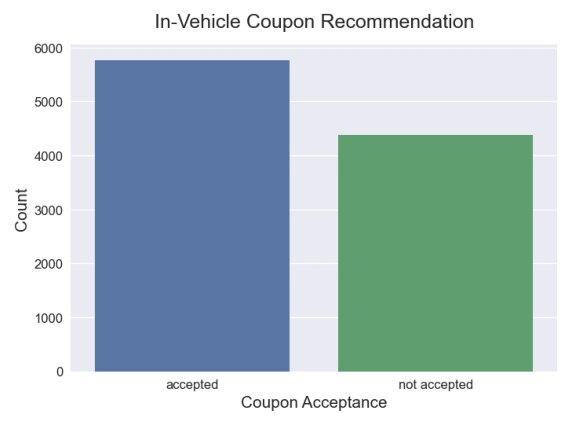

time: 98.7 ms (started: 2022-11-04 19:17:24 -07:00)


In [27]:
dpi=100
figure_filename = '../reports/figures/figure_target_variable_bar_plot_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    #get Y_train data
    _, _, Y_train_plot, _ = train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)

    #get Y_train coupon accepted and not accepted count
    df_target_plot = Y_train_plot.replace({0:'not accepted', 1:'accepted'}).value_counts().to_frame().reset_index().rename(columns={'index':'accepted_not_accepted','Y':'count'})

    axes_object = sns.barplot(data=df_target_plot, x='accepted_not_accepted', y='count')
    axes_object.set_title('In-Vehicle Coupon Recommendation', fontdict={'fontsize':18}, pad=16)
    #axes_object.set(xlabel='Coupon Acceptance', ylabel='Count')
    plt.xlabel('Coupon Acceptance', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.tick_params(labelsize=12)



    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    
plt.show()

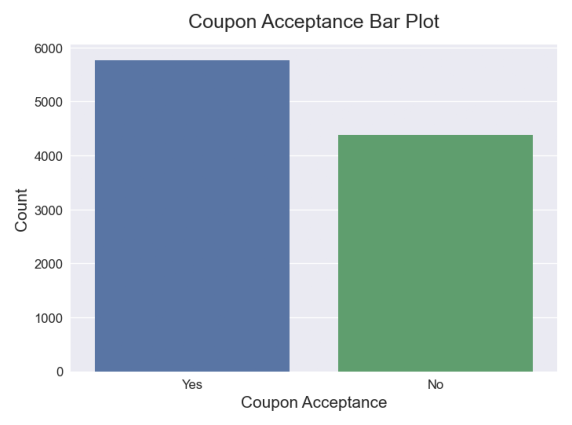

time: 74.4 ms (started: 2022-11-04 19:17:24 -07:00)


In [28]:
dpi=100
figure_filename = '../reports/figures/figure_target_variable_bar_plot_v2_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    #get Y_train data
    _, _, Y_train_plot, _ = train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)

    #get Y_train coupon accepted and not accepted count
    df_target_plot = Y_train_plot.replace({0:'No', 1:'Yes'}).value_counts().to_frame().reset_index().rename(columns={'index':'accepted_not_accepted','Y':'count'})

    axes_object = sns.barplot(data=df_target_plot, x='accepted_not_accepted', y='count')
    axes_object.set_title('Coupon Acceptance Bar Plot', fontdict={'fontsize':18}, pad=16)
    #axes_object.set(xlabel='Coupon Acceptance', ylabel='Count')
    plt.xlabel('Coupon Acceptance', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.tick_params(labelsize=12)



    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    
plt.show()

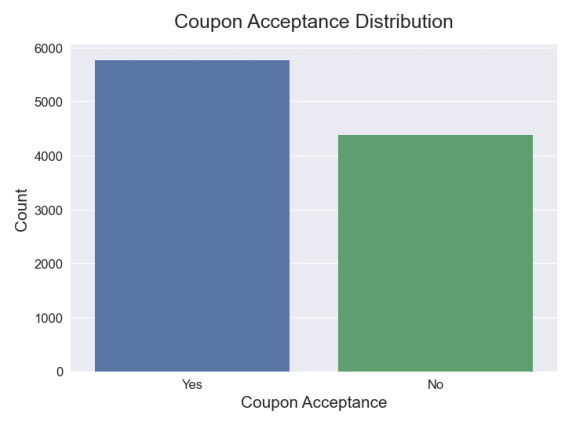

time: 73.7 ms (started: 2022-11-04 19:17:25 -07:00)


In [29]:
dpi=100
figure_filename = '../reports/figures/figure_target_variable_bar_plot_v3_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    #get Y_train data
    _, _, Y_train_plot, _ = train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)

    #get Y_train coupon accepted and not accepted count
    df_target_plot = Y_train_plot.replace({0:'No', 1:'Yes'}).value_counts().to_frame().reset_index().rename(columns={'index':'accepted_not_accepted','Y':'count'})

    axes_object = sns.barplot(data=df_target_plot, x='accepted_not_accepted', y='count')
    axes_object.set_title('Coupon Acceptance Distribution', fontdict={'fontsize':18}, pad=16)
    #axes_object.set(xlabel='Coupon Acceptance', ylabel='Count')
    plt.xlabel('Coupon Acceptance', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.tick_params(labelsize=12)



    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    
plt.show()

In [30]:
#take top features and check for statistical significant between them by response, i.e. did accept or did not accept coupon.

top_feature = 'expiration_category_representative_numeric_encoding'

df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted = df.loc[df.loc[:, 'Y'] == 0, [top_feature] + ['Y']]
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted = df.loc[df.loc[:, 'Y'] == 1, [top_feature] + ['Y']]

time: 5.13 ms (started: 2022-11-04 19:17:25 -07:00)


In [31]:
#Proportion Hypothesis Tests for Binary Data

#https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/

#2 Proportions test to compare two samples

#1 Proportion test example: comparison to a target

time: 301 µs (started: 2022-11-04 19:17:25 -07:00)


In [32]:
df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
2                                                    0    2819
24                                                   0    2655
dtype: int64

time: 3.17 ms (started: 2022-11-04 19:17:25 -07:00)


In [33]:
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
24                                                   1    4436
2                                                    1    2774
dtype: int64

time: 2.92 ms (started: 2022-11-04 19:17:25 -07:00)


In [34]:
4436 / (4436 + 2774)

0.615256588072122

time: 1.51 ms (started: 2022-11-04 19:17:25 -07:00)


In [35]:
#of scenarios where the the coupon is accepted, 61.5% of the time, it's a 24hours til expiration 

time: 182 µs (started: 2022-11-04 19:17:25 -07:00)


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabe

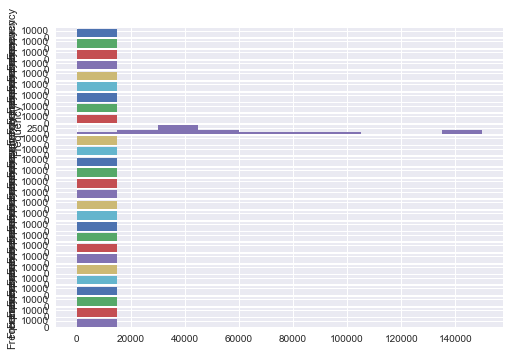

time: 1.53 s (started: 2022-11-04 19:17:25 -07:00)


In [36]:
plt.style.use('seaborn')

# Plotting as desired
df.plot.hist(subplots=True, legend=False)

In [37]:
# from io import StringIO
# import pandas as pd
# import matplotlib.pyplot as plt
# plt.style.use('seaborn')

# # Here I read your example data in
# df = pd.read_fwf(StringIO("""
#     X              Y          Z
# 0   1.000000    1.000000    1.014925    
# 1   1.000000    1.000000    1.000000
# """), header=1, index_col=0)

# # Plotting as desired
# df.plot.hist(subplots=True, legend=False)

time: 290 µs (started: 2022-11-04 19:17:26 -07:00)


In [38]:
#five types of coupons:
#bars
#takeaway food restaurants
#coffee houses
#cheap restaurants (average expense below $20 per person)
#expensive restaurants (average expense between $20 to $50 per person)

df.loc[:, 'coupon_venue_type'].value_counts()


Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon_venue_type, dtype: int64

time: 2.87 ms (started: 2022-11-04 19:17:26 -07:00)


In [39]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# dpi=100
# figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi' + str(dpi) + '_v' + filename_version + '.png'

# img = mpimg.imread(figure_filename)
# plt.imshow(img)
# plt.show()


# # reading png image
# im = img.imread('imR.png')

# lum = im[:, :, 0]

# # show image
# plt.imshow(lum)

time: 296 µs (started: 2022-11-04 19:17:26 -07:00)


In [40]:
# dpi=100
# figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi' + str(dpi) + '_v' + filename_version + '.png'

# img = mpimg.imread(figure_filename)

# if img.any() != None:
#     plt.figure(figsize=(30, 24))
#     plt.grid(False)
#     plt.axis('off')
#     plt.imshow(img)

time: 254 µs (started: 2022-11-04 19:17:26 -07:00)


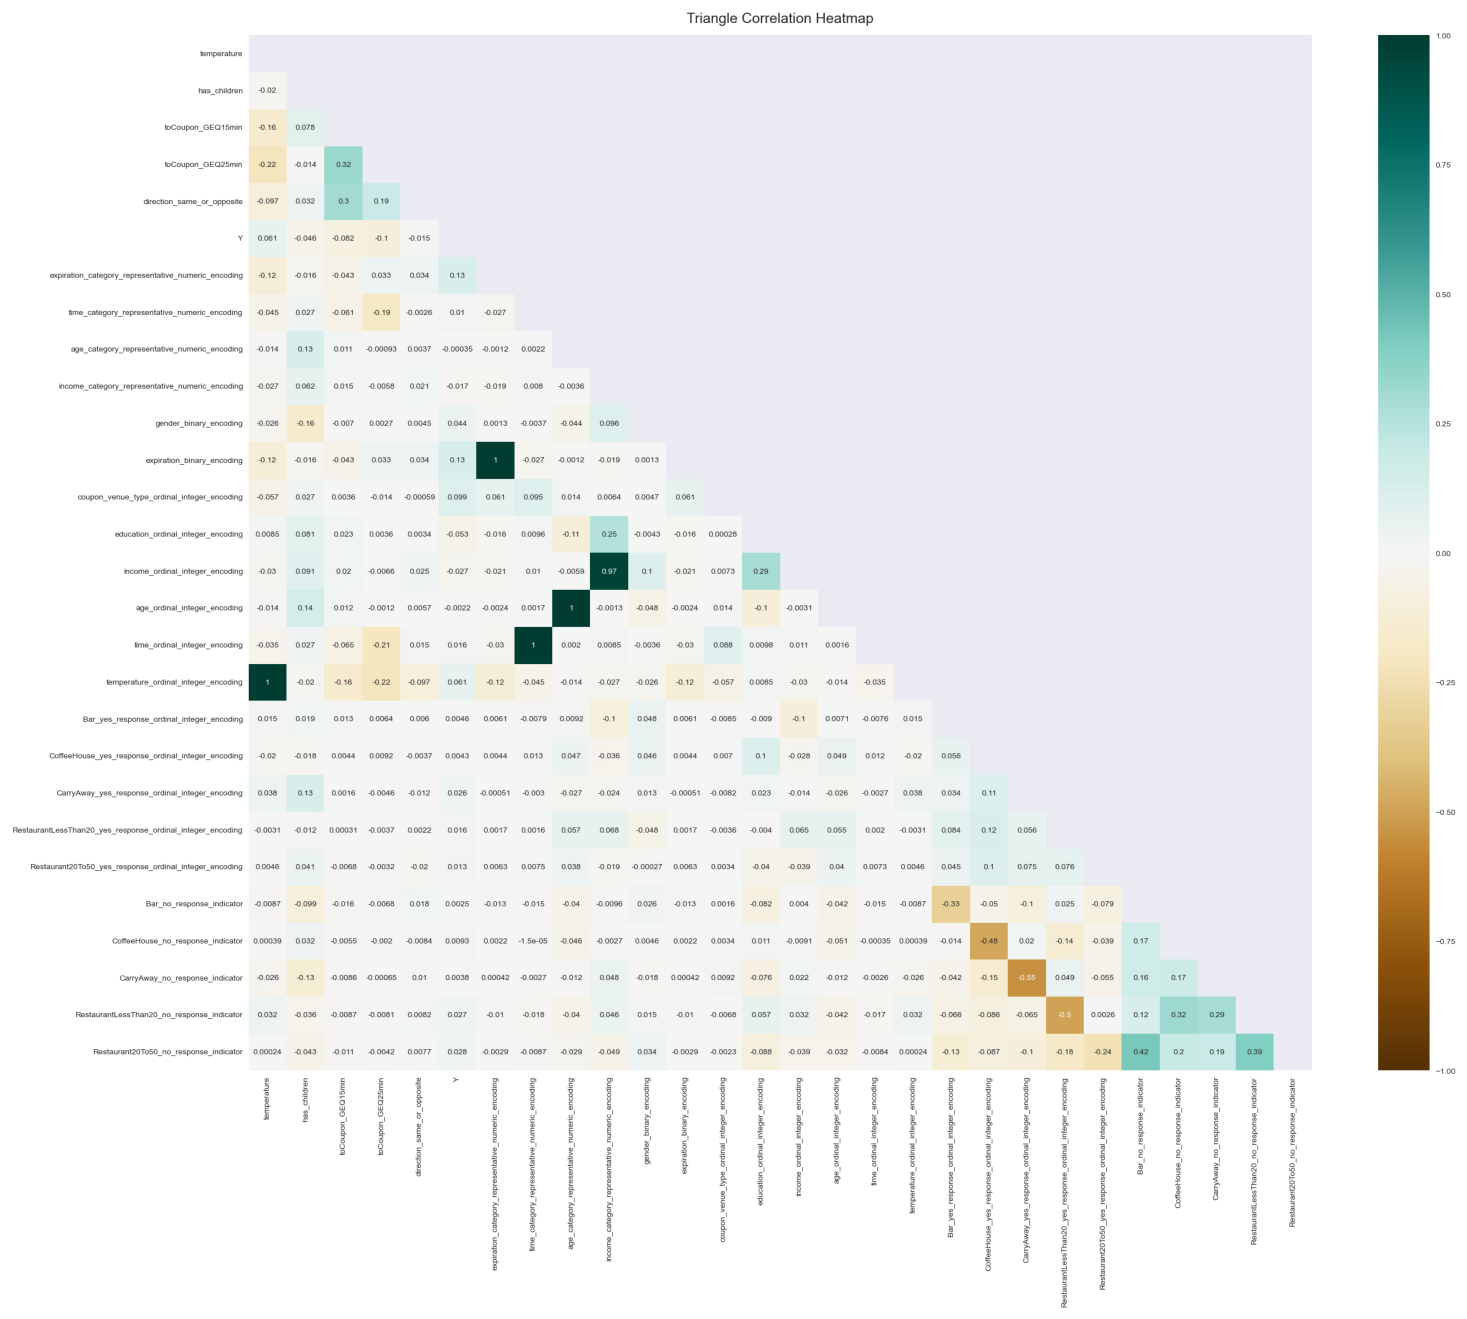

time: 662 ms (started: 2022-11-04 19:17:26 -07:00)


In [41]:
#correlation heatmap
dpi=100
figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)

if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(30, 24))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    plt.figure(figsize=(30, 24))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [42]:
#^-----fix runtime here.

time: 144 µs (started: 2022-11-04 19:17:27 -07:00)


In [43]:
#.11 correlation between coupon acceptance and reported CoffeeHouse venue visit frequency

#.099 correlation between venue coupon type and coupon accpetance

#.13 correlation between coupon expiraton and coupon acceptance

#.07 correaltio between reported expensive restaurant visit frequency and coupon acceptance

#.07 correlation between coupon acceptance and reported bar visit frequency 

#.061 correlation between temperature and coupon acceptance

#-.1 correlation between coupon acceptance and driver travel time to venue is greater than 25 minute

#-.082 correlation between coupon acceptance and driver travel time to venue is greater than 15 minute

#-.046 correlation between having children and accpeting coupon

time: 355 µs (started: 2022-11-04 19:17:27 -07:00)


In [44]:
dir()

['GradientBoostingClassifier',
 'GridSearchCV',
 'In',
 'LogisticRegression',
 'Out',
 'RandomForestClassifier',
 'StandardScaler',
 'StratifiedKFold',
 'StringIO',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_16',
 '_17',
 '_18',
 '_19',
 '_25',
 '_26',
 '_32',
 '_33',
 '_34',
 '_36',
 '_38',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'accuracy_score',
 'color',
 'column_name',
 'column_name_list',
 'column_name_list_scenario',
 'cross_val_score

time: 2.43 ms (started: 2022-11-04 19:17:27 -07:00)


In [45]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

time: 180 µs (started: 2022-11-04 19:17:27 -07:00)


In [46]:
# df_groups = pd.concat([data_frame_collection['X_train'].loc[:, 'coupon_venue_type_Bar'], data_frame_collection['Y_train'].loc[:, 'Y']], axis=1)
# p(df_groups)

time: 176 µs (started: 2022-11-04 19:17:27 -07:00)


<font size="5"><a id='[Data_Preprocessing]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Preprocessing]'>**Data Preprocessing**</a> </font>

In [47]:
#get column name lists
column_name_list_numeric = list(df.select_dtypes('number').columns)
column_name_list_not_numeric = [column_name for column_name in df.columns if not column_name in column_name_list_numeric]

#get categorical features, numeric features, and target data frame
df_categorical_features = df.loc[:, column_name_list_not_numeric]
df_numeric_features = df.loc[:, column_name_list_numeric].drop(columns='Y')
df_target = df.loc[:, ['Y']]

#get category indicators data frame from df_categorical_features
df_category_indicator_features = pd.get_dummies(df_categorical_features)

del df_categorical_features

#combine category indicator features and numeric features
df_indicator_numeric_features = pd.concat([df_category_indicator_features, df_numeric_features], axis=1)

del df_numeric_features, 

p(df_indicator_numeric_features)


(12684, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
11199                 1                            0                 0   
1474                  0                            0                 1   
10836                 1                            0                 0   
4567                  0                            1                 0   
5658                  0                            1                 0   
11343                 0                            0                 1   
9036                  1                            0                 0   
11050                 1                            0                 0   
784                   0                            0                 1   
1818                  0                            1                 0   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
11199                1                    0                 0   
1474                 1                    0                 0   
10836                1                    0                 0   
4567                 1                    0                 0   
5658                 1                    0                 0   
11343                1                    0                 0   
9036                 1                    0                 0   
11050                1                    0                 0   
784                  1                    0                 0   
1818                 0                    0                 1   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
11199                  0              0              0              1   
1474                   0              0              0              1   
10836                  0              0              0              1   
4567                   0              0              0              1   
5658                   0              0              0              1   
11343                  0              0              0              1   
9036                   0              0              1              0   
11050                  0              0              0              1   
784                    0              0              0              1   
1818                   0              0              0              1   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
11199          0          0         0         1         0   
1474           0          0         0         0         1   
10836          0          0         0         1         0   
4567           1          0         0         0         0   
5658           0          0         1         0         0   
11343          0          0         0         0         1   
9036           0          1         0         0         0   
11050          0          0         0         1         0   
784            0          0         0         0         1   
1818           1          0         0         0         0   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
11199                      0                                        1   
1474                       1                                        0   
10836                      0                                        1   
4567                       1                                        0   
5658                       0                                        0   
11343                      0                                        0   
9036                       0                                        0   
11050                      0                                        0   
784                        0                                        1   
1818                       1                                        0   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
11199                               0                                    0   
1474                                0   

time: 64.2 ms (started: 2022-11-04 19:17:27 -07:00)


In [48]:
#standardize and scale feature data frame
standard_scaler = StandardScaler()
standardized_scaled_df_indicator_numeric_features_ndarray = standard_scaler.fit_transform(df_indicator_numeric_features)
df_indicator_numeric_features_standardized_scaled = pd.DataFrame(standardized_scaled_df_indicator_numeric_features_ndarray, columns=df_indicator_numeric_features.columns)

del df_indicator_numeric_features, standardized_scaled_df_indicator_numeric_features_ndarray

p(df_indicator_numeric_features_standardized_scaled)

(12684, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
0              1.708345                    -0.990740         -0.576501   
1             -0.585362                    -0.990740          1.734604   
2              1.708345                    -0.990740         -0.576501   
3             -0.585362                     1.009347         -0.576501   
4             -0.585362                     1.009347         -0.576501   
12679         -0.585362                    -0.990740          1.734604   
12680          1.708345                    -0.990740         -0.576501   
12681          1.708345                    -0.990740         -0.576501   
12682         -0.585362                    -0.990740          1.734604   
12683         -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
0             0.858105            -0.592768         -0.293504   
1             0.858105            -0.592768         -0.293504   
2             0.858105            -0.592768         -0.293504   
3             0.858105            -0.592768         -0.293504   
4             0.858105            -0.592768         -0.293504   
12679         0.858105            -0.592768         -0.293504   
12680         0.858105            -0.592768         -0.293504   
12681         0.858105            -0.592768         -0.293504   
12682         0.858105            -0.592768         -0.293504   
12683        -1.165358            -0.592768          3.407103   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
0              -0.304303       -0.32474      -0.352942       0.509616   
1              -0.304303       -0.32474      -0.352942       0.509616   
2              -0.304303       -0.32474      -0.352942       0.509616   
3              -0.304303       -0.32474      -0.352942       0.509616   
4              -0.304303       -0.32474      -0.352942       0.509616   
12679          -0.304303       -0.32474      -0.352942       0.509616   
12680          -0.304303       -0.32474       2.833330      -1.962263   
12681          -0.304303       -0.32474      -0.352942       0.509616   
12682          -0.304303       -0.32474      -0.352942       0.509616   
12683          -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
0      -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
1      -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
2      -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
3       2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
4      -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
12679  -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
12680  -0.467505   2.307169 -0.433816 -0.584512 -0.576501   
12681  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
12682  -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
12683   2.139015  -0.433432 -0.433816 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
0                  -0.434842                                 2.073755   
1                   2.299684                                -0.482217   
2                  -0.434842                                 2.073755   
3                   2.299684                                -0.482217   
4                  -0.434842                                -0.482217   
12679              -0.434842                                -0.482217   
12680              -0.434842                                -0.482217   
12681              -0.434842                                -0.482217   
12682              -0.434842                                 2.073755   
12683               2.299684                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
0                           -0.678192                            -0.365116   
1                           -0.678192   

time: 78.3 ms (started: 2022-11-04 19:17:27 -07:00)


In [49]:
#show near identical columns

time: 172 µs (started: 2022-11-04 19:17:27 -07:00)


In [50]:
#show duplicate columns as a data frame
df_duplicated = df_indicator_numeric_features_standardized_scaled.T.duplicated(keep=False)

p(df_indicator_numeric_features_standardized_scaled.loc[:, df_duplicated])

(12684, 16)


destination_Work  time_7AM  expiration_1d  gender_Male  \
0             -0.576501 -0.576501      -1.125982     1.027012   
1              1.734604  1.734604       0.888114     1.027012   
2             -0.576501 -0.576501       0.888114     1.027012   
3             -0.576501 -0.576501       0.888114    -0.973698   
4             -0.576501 -0.576501      -1.125982    -0.973698   
12679          1.734604  1.734604      -1.125982    -0.973698   
12680         -0.576501 -0.576501      -1.125982     1.027012   
12681         -0.576501 -0.576501       0.888114     1.027012   
12682          1.734604  1.734604      -1.125982    -0.973698   
12683         -0.576501 -0.576501       0.888114    -0.973698   

       Bar_no response  CoffeeHouse_no response  CarryAway_no response  \
0            -0.168207                 3.227498               2.637677   
1            -0.168207                -0.309838              -0.379121   
2            -0.168207                 3.227498              -0.379121   
3            -0.168207                -0.309838              -0.379121   
4            -0.168207                -0.309838              -0.379121   
12679        -0.168207                -0.309838              -0.379121   
12680        -0.168207                -0.309838              -0.379121   
12681        -0.168207                -0.309838              -0.379121   
12682        -0.168207                -0.309838              -0.379121   
12683        -0.168207                -0.309838              -0.379121   

       RestaurantLessThan20_no response  Restaurant20To50_no response  \
0                              2.978392                     -0.145795   
1                             -0.335752                     -0.145795   
2                             -0.335752                     -0.145795   
3                             -0.335752                     -0.145795   
4                             -0.335752                     -0.145795   
12679                         -0.335752                     -0.145795   
12680                         -0.335752                     -0.145795   
12681                         -0.335752                     -0.145795   
12682                          2.978392                     -0.145795   
12683                         -0.335752                     -0.145795   

       gender_binary_encoding  expiration_binary_encoding  \
0                    1.027012                   -1.125982   
1                    1.027012                    0.888114   
2                    1.027012                    0.888114   
3                   -0.973698                    0.888114   
4                   -0.973698                   -1.125982   
12679               -0.973698                   -1.125982   
12680                1.027012                   -1.125982   
12681                1.027012                    0.888114   
12682               -0.973698                   -1.125982   
12683               -0.973698                    0.888114   

       Bar_no_response_indicator  CoffeeHouse_no_response_indicator  \
0                      -0.168207                           3.227498   
1                      -0.168207                          -0.309838   
2                      -0.168207                           3.227498   
3                      -0.168207                          -0.309838   
4                      -0.168207                          -0.309838   
12679                  -0.168207                          -0.309838   
12680                  -0.168207                          -0.309838   
12681                  -0.168207                          -0.309838   
12682                  -0.168207                          -0.309838   
12683                  -0.168207                          -0.309838   

       CarryAway_no_response_indicator  \
0                             2.637677   
1                            -0.379121   
2                            -0.379121   
3                            -0.379121   
4       

time: 773 ms (started: 2022-11-04 19:17:27 -07:00)


In [51]:
p(df_target)

(12684, 1)


Y
11199  1
1474   0
10836  1
4567   0
5658   1
11343  0
9036   0
11050  0
784    1
1818   0

time: 3.17 ms (started: 2022-11-04 19:17:28 -07:00)


In [52]:
#train test split need stratification (because of target variable imbalance) or is the dataset large enough???


time: 189 µs (started: 2022-11-04 19:17:28 -07:00)


In [53]:
#save preprocessed data frame
data_frame_version=filename_version
data_frame_collection_filename='data_frame_collection_train_test_v' + data_frame_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename, parse_dates=False)
if df_readback != None:
    data_frame_collection = df_readback
else:
    data_frame_collection = {}
    
    #split the data into train and test
    data_frame_collection['X_train'], data_frame_collection['X_test'], data_frame_collection['Y_train'], data_frame_collection['Y_test'] = \
    train_test_split(df_indicator_numeric_features_standardized_scaled, df_target, test_size=.2, random_state=200)
    
    #save preprocessed data frame collection
    data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename)

del df_indicator_numeric_features_standardized_scaled

p(data_frame_collection['X_train'])

This file already exists
(10147, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
3298          -0.585362                     1.009347         -0.576501   
12556         -0.585362                     1.009347         -0.576501   
4455          -0.585362                     1.009347         -0.576501   
6322          -0.585362                     1.009347         -0.576501   
4133          -0.585362                     1.009347         -0.576501   
11343         -0.585362                     1.009347         -0.576501   
9036          -0.585362                     1.009347         -0.576501   
11050          1.708345                    -0.990740         -0.576501   
784           -0.585362                     1.009347         -0.576501   
1818          -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
3298         -1.165358             1.686999         -0.293504   
12556        -1.165358             1.686999         -0.293504   
4455          0.858105            -0.592768         -0.293504   
6322         -1.165358             1.686999         -0.293504   
4133         -1.165358             1.686999         -0.293504   
11343        -1.165358            -0.592768          3.407103   
9036          0.858105            -0.592768         -0.293504   
11050         0.858105            -0.592768         -0.293504   
784          -1.165358             1.686999         -0.293504   
1818         -1.165358             1.686999         -0.293504   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
3298           -0.304303       -0.32474      -0.352942       0.509616   
12556          -0.304303       -0.32474      -0.352942       0.509616   
4455           -0.304303        3.07939      -0.352942      -1.962263   
6322           -0.304303       -0.32474      -0.352942       0.509616   
4133           -0.304303       -0.32474      -0.352942       0.509616   
11343          -0.304303       -0.32474       2.833330      -1.962263   
9036           -0.304303        3.07939      -0.352942      -1.962263   
11050          -0.304303       -0.32474      -0.352942       0.509616   
784            -0.304303       -0.32474      -0.352942       0.509616   
1818           -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
3298   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
12556  -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
4455   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
6322   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
4133   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
11343  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
9036    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
11050  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
784     2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
1818    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
3298               -0.434842                                -0.482217   
12556              -0.434842                                -0.482217   
4455               -0.434842                                 2.073755   
6322               -0.434842                                -0.482217   
4133               -0.434842                                -0.482217   
11343               2.299684                                -0.482217   
9036                2.299684                                -0.482217   
11050              -0.434842                                -0.482217   
784                -0.434842                                -0.482217   
1818               -0.434842                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
3298                         1.474508                            -0.365116   
12556                        1.474508   

time: 66.8 ms (started: 2022-11-04 19:17:28 -07:00)


stratified Y_test coupon acceptance count from train_test_split: 1442


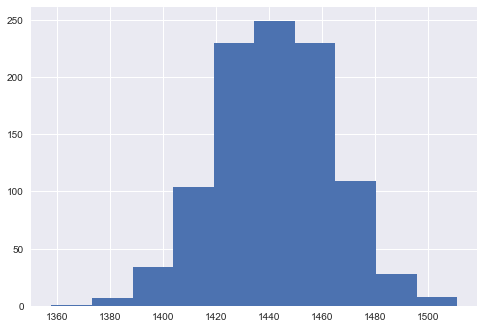

time: 4.01 s (started: 2022-11-04 19:17:28 -07:00)


In [54]:
#test: stratified or not stratified split?
icr.get_Y_test_distribution_from_train_test_split_iterations(df, number_of_iterations=1000)

In [55]:
#fair to use stratified splits between train and test????

    #creates an artificially favorable ratio when the sample is split to represent the test set (i.e. like another sample population)
    
    #our dataset is a sample population and our marketing campaign will target a sample population.
    
    
    #the reality is our sample population is like taking a random sample, and targeted ads are shown to the subgroup of another sample population.
    #we can't control target variable data representation going from our survey to the in field targeted ads, so we shouldn't control it here???
    
    #OR
    
    #we are controling the target variable representation to fix a variable we don't want to worry about down the line. Down the line, we will have 
    #more data on customer behavior and considering the size of the hold out set, we want it to be representative of a larger dataset (i.e. our train data
    # which we believe is representative of the target population)
    

time: 447 µs (started: 2022-11-04 19:17:32 -07:00)


In [56]:
print(data_frame_collection['X_train'].shape, data_frame_collection['X_test'].shape, data_frame_collection['Y_train'].shape, data_frame_collection['Y_test'].shape)

(10147, 140) (2537, 140) (10147, 1) (2537, 1)
time: 467 µs (started: 2022-11-04 19:17:32 -07:00)


In [57]:
#this filtered survey as a dataset is our best approximation of the population????

#how do we know what the population is??? the population is those are targeting to coupon recommendation??? we are defining the population then???

#we could go the route of create ML based on the general population???? i mean there is already biased based on who would take a survey???
#i am assuming there is a bias for lower income individuals in surveys because they take time and don't pay well

#what is the demographic distribution of america by income??? <--- not going to be our target audience because coupon users and survey takers
#are going to be lower income than the general population of america.

#there is an inherit bias because coupon users and survey takers are different???


time: 365 µs (started: 2022-11-04 19:17:32 -07:00)


In [58]:
#we don't know what are target audience of coupon acceptor is, this what we are trying to figure out!!

#class label stratification seems to make sense here then???



time: 197 µs (started: 2022-11-04 19:17:32 -07:00)


In [59]:
dir()

['GradientBoostingClassifier',
 'GridSearchCV',
 'In',
 'LogisticRegression',
 'Out',
 'RandomForestClassifier',
 'StandardScaler',
 'StratifiedKFold',
 'StringIO',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_16',
 '_17',
 '_18',
 '_19',
 '_25',
 '_26',
 '_32',
 '_33',
 '_34',
 '_36',
 '_38',
 '_44',
 '_47',
 '_48',
 '_50',
 '_51',
 '_53',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i

time: 2.32 ms (started: 2022-11-04 19:17:32 -07:00)


In [60]:
#we know what typse of coupons and their frequency in the survey. What types of coupons will be used the most for targetting customers?
#what venue types are requesting the most coupons???

#should the venue coupon demand influence how we design our train test splits ml model????
#the survey is supposed to attempt to represent the population which is in-vehicle coupon acceptance??? or is this recommendation??


time: 271 µs (started: 2022-11-04 19:17:32 -07:00)


## Get Stratified 5-Fold Cross Validation X_train, X_test, Y_train, Y_test Collection

In [61]:
#stratified 5-fold cross validation train-test data row selection

#Stratified 5-Fold object
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#get stratfied 5-fold data frame splits
stratified_fold_number_X_train_X_test_Y_train_Y_test_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)] = \
    {'X_train' : data_frame_collection['X_train'].iloc[train_index, :], \
     'X_test' : data_frame_collection['X_train'].iloc[test_index, :], \
     'Y_train' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[train_index], \
     'Y_test' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_train'])

fold 0 TRAIN: [ 2028  2030  2031 ... 10144 10145 10146] TEST: [   0    1    2 ... 2027 2029 2032]
fold 1 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [2028 2030 2031 ... 4095 4101 4102]
fold 2 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [4009 4010 4012 ... 6131 6133 6135]
fold 3 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [6036 6037 6043 ... 8126 8127 8128]
fold 4 TRAIN: [   0    1    2 ... 8126 8127 8128] TEST: [ 8099  8105  8109 ... 10144 10145 10146]

(8117, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
10137         -0.585362                     1.009347         -0.576501   
11756         -0.585362                    -0.990740          1.734604   
1217          -0.585362                    -0.990740          1.734604   
713            1.708345                    -0.990740         -0.576501   
6523          -0.585362                     1.009347         -0.576501   
11343         -0.585362                     1.009347         -0.576501   
9036          -0.585362                     1.009347         -0.576501   
11050          1.708345                    -0.990740         -0.576501   
784           -0.585362                     1.009347         -0.576501   
1818          -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
10137        -1.165358             1.686999         -0.293504   
11756         0.858105            -0.592768         -0.293504   
1217          0.858105            -0.592768         -0.293504   
713           0.858105            -0.592768         -0.293504   
6523         -1.165358            -0.592768         -0.293504   
11343        -1.165358            -0.592768          3.407103   
9036          0.858105            -0.592768         -0.293504   
11050         0.858105            -0.592768         -0.293504   
784          -1.165358             1.686999         -0.293504   
1818         -1.165358             1.686999         -0.293504   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
10137          -0.304303       -0.32474      -0.352942       0.509616   
11756          -0.304303       -0.32474      -0.352942       0.509616   
1217           -0.304303       -0.32474      -0.352942       0.509616   
713            -0.304303        3.07939      -0.352942      -1.962263   
6523            3.286194       -0.32474      -0.352942       0.509616   
11343          -0.304303       -0.32474       2.833330      -1.962263   
9036           -0.304303        3.07939      -0.352942      -1.962263   
11050          -0.304303       -0.32474      -0.352942       0.509616   
784            -0.304303       -0.32474      -0.352942       0.509616   
1818           -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
10137   2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
11756  -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
1217   -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
713    -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
6523    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
11343  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
9036    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
11050  -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
784     2.139015  -0.433432 -0.433816 -0.584512 -0.576501   
1818    2.139015  -0.433432 -0.433816 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
10137              -0.434842                                 2.073755   
11756              -0.434842                                -0.482217   
1217               -0.434842                                -0.482217   
713                 2.299684                                -0.482217   
6523                2.299684                                -0.482217   
11343               2.299684                                -0.482217   
9036                2.299684                                -0.482217   
11050              -0.434842                                -0.482217   
784                -0.434842                                -0.482217   
1818               -0.434842                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
10137                       -0.678192                            -0.365116   
11756                       -0.678192   

time: 80.6 ms (started: 2022-11-04 19:17:32 -07:00)


In [62]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_train'])

(8117,)


11981    1
3996     1
1301     1
9720     0
752      0
10949    0
11937    0
735      1
67       1
3251     1
Name: Y, dtype: int64

time: 2.31 ms (started: 2022-11-04 19:17:32 -07:00)


In [63]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_test'])

(2030, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
3298          -0.585362                     1.009347         -0.576501   
12556         -0.585362                     1.009347         -0.576501   
4455          -0.585362                     1.009347         -0.576501   
6322          -0.585362                     1.009347         -0.576501   
4133          -0.585362                     1.009347         -0.576501   
9912          -0.585362                     1.009347         -0.576501   
9989          -0.585362                    -0.990740          1.734604   
12546          1.708345                    -0.990740         -0.576501   
8892          -0.585362                     1.009347         -0.576501   
11633         -0.585362                     1.009347         -0.576501   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
3298         -1.165358             1.686999         -0.293504   
12556        -1.165358             1.686999         -0.293504   
4455          0.858105            -0.592768         -0.293504   
6322         -1.165358             1.686999         -0.293504   
4133         -1.165358             1.686999         -0.293504   
9912         -1.165358             1.686999         -0.293504   
9989          0.858105            -0.592768         -0.293504   
12546         0.858105            -0.592768         -0.293504   
8892         -1.165358             1.686999         -0.293504   
11633        -1.165358             1.686999         -0.293504   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
3298           -0.304303       -0.32474      -0.352942       0.509616   
12556          -0.304303       -0.32474      -0.352942       0.509616   
4455           -0.304303        3.07939      -0.352942      -1.962263   
6322           -0.304303       -0.32474      -0.352942       0.509616   
4133           -0.304303       -0.32474      -0.352942       0.509616   
9912           -0.304303       -0.32474      -0.352942       0.509616   
9989           -0.304303       -0.32474       2.833330      -1.962263   
12546          -0.304303        3.07939      -0.352942      -1.962263   
8892           -0.304303       -0.32474      -0.352942       0.509616   
11633          -0.304303       -0.32474      -0.352942       0.509616   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
3298   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
12556  -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
4455   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
6322   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
4133   -0.467505  -0.433432 -0.433816  1.710829 -0.576501   
9912   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
9989   -0.467505  -0.433432 -0.433816 -0.584512  1.734604   
12546  -0.467505   2.307169 -0.433816 -0.584512 -0.576501   
8892   -0.467505  -0.433432  2.305122 -0.584512 -0.576501   
11633  -0.467505  -0.433432  2.305122 -0.584512 -0.576501   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
3298               -0.434842                                -0.482217   
12556              -0.434842                                -0.482217   
4455               -0.434842                                 2.073755   
6322               -0.434842                                -0.482217   
4133               -0.434842                                -0.482217   
9912               -0.434842                                -0.482217   
9989               -0.434842                                -0.482217   
12546              -0.434842                                -0.482217   
8892               -0.434842                                -0.482217   
11633              -0.434842                                -0.482217   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
3298                         1.474508                            -0.365116   
12556                        1.474508   

time: 57.8 ms (started: 2022-11-04 19:17:32 -07:00)


In [64]:
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['Y_test'])

(2030,)


8630     1
2418     1
10804    0
747      1
7333     1
1460     1
8449     1
11224    0
5085     0
7156     0
Name: Y, dtype: int64

time: 3 ms (started: 2022-11-04 19:17:32 -07:00)


<font size="5"><a id='[Modeling]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling]'>**Modeling**</a> </font>

## Initialize Filename & Results Collection Variables

In [65]:
classifier_name_list = ['random_forest_classifier', 'gradient_boosting_classifier', 'logistic_regression_classifier']

#filename
grid_search_models_filename_collection={}
model_filename_collection = {}
model_cross_validation_results_filename_collection = {}
learning_curve_results_filename_collection = {}


for classifier_name in classifier_name_list:
    grid_search_models_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_v' + filename_version + '.pkl'
    model_filename_collection[classifier_name]='best_stratified_5_fold_grid_search_cross_validation_'+ classifier_name + '_v' + filename_version + '.pkl'
    model_cross_validation_results_filename_collection[classifier_name]='best_' + classifier_name + '_stratified_5_fold_cross_validation_results_v' + filename_version + '.pkl'
    learning_curve_results_filename_collection[classifier_name]='learning_curve_results_best_' + classifier_name + '_v' + filename_version + '.pkl'

model_version=filename_version

time: 772 µs (started: 2022-11-04 19:17:32 -07:00)


## Initialize Other Variables

In [66]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
model_stratified_5_fold_cross_validation_results_collection = {}



time: 303 µs (started: 2022-11-04 19:17:32 -07:00)


## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy

In [67]:
#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation

    # Create the parameter grid based on the results of random search
    param_grid = {
        'bootstrap': [False ,True],
        'criterion':['gini'],
        'max_features':['auto'],
        'max_depth': [3, 5, 10, 20, 25, None], #ba 3, past 25 is a lot (and can be left to whatever large max depth then); previously [5, 10, 20, 25, 30, 35, 40]
        'min_samples_split': [1, 10, 50, 100], #ba 1, 10, 50, 100; previously [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
        'min_samples_leaf':[1],
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'warm_start':[False]
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'
    
    #RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4,
                       #n_estimators=200, random_state=200)

    # Create a based model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = GridSearchCV(estimator=random_forest_classifier, 
                                                                                           param_grid=param_grid, 
                                                                                           cv=StratifiedKFold_5_splits,
                                                                                           n_jobs=-1, 
                                                                                           verbose=0,
                                                                                           scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                         filename=grid_search_models_filename_collection['random_forest_classifier'],
                                                                                                         add_compressed_file=False)
    
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

stratified_5_fold_grid_search_cross_validation_random_forest_classifier

This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 25, None],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 10, 50, 100],
                         'n_estimators': [200], 'warm_start': [False]})

time: 34.6 ms (started: 2022-11-04 19:17:32 -07:00)


In [68]:
#scoring? multimetric??

time: 176 µs (started: 2022-11-04 19:17:32 -07:00)


## Get Best Random Forest Classifier by Accuracy

In [69]:
#get best random forest classifier
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['random_forest_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = stratified_5_fold_grid_search_cross_validation_random_forest_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                              filename=model_filename_collection['random_forest_classifier'],
                                                                                                              add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier


This file already exists


RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                       random_state=200)

time: 31.6 ms (started: 2022-11-04 19:17:32 -07:00)


In [70]:
#Regarding how to evaluate the performance of a classifier, especially when the data is imbalanced between classes, 
#you could consider precision and recall as your metrics of choice. I think it's a better measure of how 'good' a 
#classifier is than straight accuracy or auc for roc curves (without knowing more about your context/goals).



#Precision = TruePositives / (TruePositives + FalsePositives)
#Recall = TruePositives / (TruePositives + FalseNegatives)


time: 316 µs (started: 2022-11-04 19:17:32 -07:00)


In [71]:
#this suggests we have a better prediction of coupon acceptance among those who actually accept the coupon
#compared to our prediction of coupon acceptance among those we predict are going to accept the coupon.

#what does this mean? does it matter???

#how does it effect the business problem??

#precision is possibly those who we would want to market to. Of this group, we have a 0.83 acceptance rate.

time: 309 µs (started: 2022-11-04 19:17:32 -07:00)


In [72]:
#recall is those that would actual accept the coupon, so it's our hindsight 20 20.

time: 184 µs (started: 2022-11-04 19:17:32 -07:00)


In [73]:
#should be using cross validation score precision and recall.

#there a function for this???



time: 201 µs (started: 2022-11-04 19:17:32 -07:00)


In [74]:
#get proper parameters??

time: 172 µs (started: 2022-11-04 19:17:32 -07:00)


## Get Stratified 5-Fold Cross Validation Best Random Forest Classifier Results

In [75]:
data_collection_readback = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_results_filename_collection['random_forest_classifier'])
if data_collection_readback != None:
    best_random_forest_classifier_stratified_5_fold_cross_validation_results = data_collection_readback
else:
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score), 
               'f1_score' : make_scorer(f1_score)}

    random_forest_classifier=RandomForestClassifier(bootstrap=False, 
                                                    max_depth=25, 
                                                    min_samples_split=4, 
                                                    n_estimators=200,
                                                    min_samples_leaf=1,
                                                    max_features='auto',
                                                    criterion='gini',
                                                    warm_start='False',
                                                    random_state=200)

    best_random_forest_classifier_stratified_5_fold_cross_validation_results = cross_validate(estimator=random_forest_classifier,
                                                                                              X=data_frame_collection['X_train'],
                                                                                              y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                              cv=StratifiedKFold_5_splits,
                                                                                              scoring=scoring)
    #save it
    best_random_forest_classifier_stratified_5_fold_cross_validation_results = icr.save_and_return_collection(best_random_forest_classifier_stratified_5_fold_cross_validation_results, 
                                                                                                              filename=model_cross_validation_results_filename_collection['random_forest_classifier'])


model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier'] = best_random_forest_classifier_stratified_5_fold_cross_validation_results
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']



This file already exists


{'fit_time': array([2.05496812, 2.20044494, 2.00947499, 2.02139711, 1.992033  ]),
 'score_time': array([0.07483602, 0.10303187, 0.07700825, 0.07758999, 0.07257891]),
 'test_accuracy': array([0.75566502, 0.76995074, 0.76096599, 0.75110892, 0.7683588 ]),
 'test_precision': array([0.75845791, 0.76862745, 0.76744186, 0.77116513, 0.77678571]),
 'test_recall': array([0.83607979, 0.85069444, 0.83072917, 0.79861111, 0.83072917]),
 'test_f1_score': array([0.79537954, 0.80758138, 0.79783243, 0.78464819, 0.80285235])}

time: 4.08 ms (started: 2022-11-04 19:17:32 -07:00)


In [76]:
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy'].mean()))


del best_random_forest_classifier_stratified_5_fold_cross_validation_results

model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_precision'].mean(): 0.7684956125630998
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_recall'].mean(): 0.8293687361472488
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_f1_score'].mean(): 0.7976587761888356
model_stratified_5_fold_cross_validation_results_collection['best_random_forest_classifier']['test_accuracy'].mean(): 0.761209894946915
time: 1.06 ms (started: 2022-11-04 19:17:32 -07:00)


In [77]:
#^---- recall possibly high because of class imbalance toward in-vehicle coupon recommendation??????

#this an ML problem??

#this a survey problem methods problem?????? or just a normal issue dealt with???

#bootstrapping the dataset for a class balance better??? 



time: 228 µs (started: 2022-11-04 19:17:32 -07:00)


In [78]:
#is it possible recall is just easier than precision in general????

#are there cases where precision is higher than recall????



time: 193 µs (started: 2022-11-04 19:17:32 -07:00)


In [79]:
#should have built random forest to optimize for f1 score??? what about the more fundamental precision or recall?? 
#acccuracy seems more all encompassing on just getting the correct prediction instead of focusing on rates related to coupon acceptance???


time: 221 µs (started: 2022-11-04 19:17:32 -07:00)


In [80]:
#want 5-fold cross validation prediction structure for random forest from N estimators

time: 184 µs (started: 2022-11-04 19:17:32 -07:00)


In [81]:
#want to train 5 random forest classifier using each of the train folds 0, 1, 2, 3, 4

#next want to use each random forest classifier to get predictions from each estimator per test fold (i.e. folds 0, 1, 2, 3, 4)



time: 227 µs (started: 2022-11-04 19:17:32 -07:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Collection

In [82]:
cross_validation_model_collection = 'stratified_5_fold_cross_validation_random_forest_classifier_collection_v' + model_version + '.pkl'

models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection)
if models_readback != None:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = {}
    for index in range(5):

        #create random forest classifier
        random_forest_classifier=RandomForestClassifier(bootstrap=False, 
                                                        max_depth=None, 
                                                        min_samples_split=10, 
                                                        n_estimators=200,
                                                        min_samples_leaf=1,
                                                        max_features='auto',
                                                        criterion='gini',
                                                        warm_start='False',
                                                        random_state=200)
        
        #RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                       #random_state=200)

        #train random forest classifier and save random forest classifer per fold
        random_forest_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                     y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)] = random_forest_classifier


    #save stratified 5-fold cross validation random forest classifier collection
    stratified_5_fold_cross_validation_random_forest_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_random_forest_classifier_collection, 
                                                                                                        filename=cross_validation_model_collection,
                                                                                                        add_compressed_file=False)
stratified_5_fold_cross_validation_random_forest_classifier_collection


This file already exists


{'fold 0': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 1': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 2': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 3': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 4': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False')}

time: 159 ms (started: 2022-11-04 19:17:32 -07:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Collection

In [83]:
cross_validation_model_prediction_collection = 'stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection_v' + model_version + '.pkl'

prediction_data_frame_collection = icr.return_processed_collection_if_it_exists(filename=cross_validation_model_prediction_collection)
if prediction_data_frame_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection = prediction_data_frame_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)]\
        .predict(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    
    
    #data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename, index=False, parse_dates=False)


    #save stratified 5-fold cross validation random forest classifier prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection, 
                                                                                                                       filename=cross_validation_model_prediction_collection)
stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection['fold 0']


This file already exists


array([1, 1, 0, ..., 0, 1, 1])

time: 3.67 ms (started: 2022-11-04 19:17:32 -07:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Collection

In [84]:
cross_validation_model_prediction_probability_collection = 'stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection_v' + model_version + '.pkl'

prediction_probability_data_frame_collection = icr.return_processed_collection_if_it_exists(filename=cross_validation_model_prediction_collection)
if prediction_data_frame_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = prediction_probability_data_frame_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    
    
    #data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename, index=False, parse_dates=False)


    #save stratified 5-fold cross validation random forest classifier prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection, 
                                                                                                                       filename=cross_validation_model_prediction_probability_collection)
stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold 0']


This file already exists


array([1, 1, 0, ..., 0, 1, 1])

time: 4.54 ms (started: 2022-11-04 19:17:32 -07:00)


In [85]:
import warnings
warnings.filterwarnings('ignore')

time: 247 µs (started: 2022-11-04 19:17:32 -07:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Estimator Prediction Probability Collection

In [86]:
#prediction probability collection
cross_validation_model_estimator_prediction_probability_collection = 'stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection_v' + model_version + '.pkl'

list_array_collection = icr.return_processed_collection_if_it_exists(filename=cross_validation_model_estimator_prediction_probability_collection)
if list_array_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection = list_array_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection = {}
    for fold_index in range(5):

        number_of_rows_in_fold = stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_index)]['X_test'].shape[0]
        class1_probability_index = [class1_index for class1_index in range(2*number_of_rows_in_fold) if class1_index % 2 != 0]
        
        stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection['fold ' + str(fold_index)] = \
        pd.DataFrame([stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(fold_index)].estimators_[estimator_index]\
         .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_index)]['X_test']).flatten()[class1_probability_index] \
         for estimator_index in range(200)]).T


    #save stratified 5-fold cross validation random forest classifier estimator prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection = icr.save_and_return_collection(stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection, 
                                                                                                                                             filename=cross_validation_model_estimator_prediction_probability_collection)

p(stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection['fold 0'])


This file already exists
(2030, 200)


0         1         2         3         4         5         6    \
0     1.000000  0.857143  0.666667  0.833333  0.555556  1.000000  0.571429   
1     0.875000  0.000000  0.500000  0.800000  0.166667  1.000000  0.600000   
2     0.125000  1.000000  0.285714  0.333333  1.000000  0.500000  0.222222   
3     0.000000  0.888889  1.000000  1.000000  0.250000  1.000000  0.875000   
4     0.000000  0.500000  1.000000  0.500000  0.000000  0.500000  1.000000   
2025  0.375000  0.600000  1.000000  0.444444  1.000000  0.875000  1.000000   
2026  0.428571  0.222222  0.000000  0.200000  0.142857  0.000000  0.250000   
2027  1.000000  0.000000  0.714286  0.142857  0.625000  0.666667  0.000000   
2028  1.000000  0.888889  1.000000  0.833333  1.000000  1.000000  0.250000   
2029  0.200000  1.000000  0.444444  0.375000  0.428571  1.000000  1.000000   

           7         8         9         10        11        12        13   \
0     0.333333  1.000000  0.833333  1.000000  0.375000  1.000000  1.000000   
1     1.000000  1.000000  0.666667  0.444444  1.000000  0.555556  1.000000   
2     0.111111  1.000000  0.125000  0.000000  1.000000  1.000000  0.000000   
3     1.000000  0.400000  1.000000  0.888889  1.000000  1.000000  0.222222   
4     1.000000  0.333333  0.833333  1.000000  0.714286  0.625000  0.750000   
2025  0.800000  0.857143  1.000000  1.000000  0.750000  1.000000  0.800000   
2026  0.222222  0.500000  0.000000  0.571429  0.800000  0.833333  0.000000   
2027  0.142857  0.222222  0.000000  0.200000  0.000000  0.600000  0.250000   
2028  1.000000  0.200000  0.857143  0.666667  1.000000  1.000000  0.666667   
2029  0.000000  0.333333  0.444444  0.166667  0.500000  0.666667  0.500000   

           14        15        16        17        18        19        20   \
0     1.000000  1.000000  1.000000  0.500000  1.000000  0.666667  1.000000   
1     0.571429  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
2     0.222222  0.555556  0.125000  1.000000  1.000000  0.833333  0.666667   
3     1.000000  0.750000  0.666667  1.000000  0.666667  0.500000  1.000000   
4     1.000000  0.571429  0.666667  0.666667  1.000000  0.444444  1.000000   
2025  1.000000  0.250000  1.000000  0.600000  0.600000  1.000000  1.000000   
2026  0.000000  0.800000  0.000000  0.000000  0.000000  0.555556  0.428571   
2027  0.000000  0.000000  0.000000  0.571429  0.333333  0.000000  0.000000   
2028  0.666667  0.777778  1.000000  0.777778  0.500000  1.000000  1.000000   
2029  1.000000  0.777778  0.000000  0.750000  0.250000  0.888889  0.142857   

        21        22        23        24        25        26        27   \
0     0.500  1.000000  1.000000  0.555556  1.000000  0.444444  1.000000   
1     0.500  0.500000  0.222222  0.666667  0.333333  1.000000  0.875000   
2     0.500  0.000000  0.666667  0.333333  0.500000  1.000000  1.000000   
3     1.000  0.800000  0.875000  0.000000  0.200000  1.000000  0.000000   
4     0.375  0.375000  0.888889  0.500000  1.000000  0.285714  0.571429   
2025  1.000  0.600000  0.777778  1.000000  1.000000  1.000000  1.000000   
2026  0.625  0.333333  0.000000  0.000000  0.375000  0.000000  0.000000   
2027  0.000  0.000000  0.555556  0.000000  0.666667  0.555556  0.000000   
2028  1.000  1.000000  1.000000  0.875000  1.000000  1.000000  1.000000   
2029  0.000  0.500000  0.333333  0.375000  1.000000  0.555556  1.000000   

           28        29        30        31        32        33        34   \
0     1.000000  1.000000  1.000000  0.833333  0.250000  0.500000  1.000000   
1     0.888889  0.000000  0.875000  0.500000  1.000000  0.750000  1.000000   
2     1.000000  1.000000  0.500000  0.250000  0.400000  1.000000  0.166667   
3     1.000000  0.800000  0.666667  0.833333  0.666667  1.000000  0.666667   
4     0.714286  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
2025  0.750000  0.888889  0.875000  1.000000  0.833333  0.250000  1.000000   
2026  0.000000  0.000000  0.222222  0.800000  0.600000  1.0000

time: 86.3 ms (started: 2022-11-04 19:17:32 -07:00)


## Convert to Estimator Predicition Probability Data Frame from Estimator Prediction Probability Data Frame Collection

In [87]:
#convert estimator prediction probability collection folds 0 thru 4 to a single data frame
data_frame_list = [stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection['fold ' + str(fold_index)] for fold_index in range(5)]
del stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_collection
df_estimator_prediction_probability = pd.concat(data_frame_list)
df_estimator_prediction_probability = df_estimator_prediction_probability.reset_index(drop=True)


#get column name dictionary
column_name_list_number = [number for number in range(200)]
column_name_list_estimator_number_prediction_probability = ['estimator' + str(number) + '_prediction_probability' for number in range(200)]
column_name_dict_estimator_number_prediction_probability = dict(zip(column_name_list_number, column_name_list_estimator_number_prediction_probability))

#rename columns
df_estimator_prediction_probability = df_estimator_prediction_probability.rename(columns=column_name_dict_estimator_number_prediction_probability)


p(df_estimator_prediction_probability)

(10147, 200)


estimator0_prediction_probability  estimator1_prediction_probability  \
0                               1.000000                           0.857143   
1                               0.875000                           0.000000   
2                               0.125000                           1.000000   
3                               0.000000                           0.888889   
4                               0.000000                           0.500000   
10142                           0.333333                           0.250000   
10143                           0.600000                           1.000000   
10144                           0.571429                           1.000000   
10145                           1.000000                           1.000000   
10146                           0.777778                           0.555556   

       estimator2_prediction_probability  estimator3_prediction_probability  \
0                               0.666667                           0.833333   
1                               0.500000                           0.800000   
2                               0.285714                           0.333333   
3                               1.000000                           1.000000   
4                               1.000000                           0.500000   
10142                           0.500000                           0.500000   
10143                           1.000000                           0.666667   
10144                           0.285714                           0.666667   
10145                           1.000000                           1.000000   
10146                           1.000000                           0.166667   

       estimator4_prediction_probability  estimator5_prediction_probability  \
0                               0.555556                           1.000000   
1                               0.166667                           1.000000   
2                               1.000000                           0.500000   
3                               0.250000                           1.000000   
4                               0.000000                           0.500000   
10142                           0.000000                           0.000000   
10143                           0.428571                           1.000000   
10144                           1.000000                           0.375000   
10145                           0.888889                           0.428571   
10146                           0.375000                           1.000000   

       estimator6_prediction_probability  estimator7_prediction_probability  \
0                               0.571429                           0.333333   
1                               0.600000                           1.000000   
2                               0.222222                           0.111111   
3                               0.875000                           1.000000   
4                               1.000000                           1.000000   
10142                           0.000000                           0.250000   
10143                           1.000000                           0.833333   
10144                           0.250000                           0.750000   
10145                           1.000000                           0.625000   
10146                           0.875000                           0.666667   

       estimator8_prediction_probability  estimator9_prediction_probability  \
0                               1.000000                           0.833333   
1                               1.000000                           0.666667   
2                               1.000000                           0.125000   
3                               0.400000                           1.000000   
4                               0.333333                           0.833333   
10142                           0.000000             

time: 90.4 ms (started: 2022-11-04 19:17:33 -07:00)


## Get 10,000 Estimator Prediction Probability n=5 Bootstrap Means

In [88]:
#get bootstrap n=5 samples, 10,000 replicas
np.random.seed(seed=200)
estimator_prediction_probability_n_5_bootstrap_mean = pd.DataFrame([df_estimator_prediction_probability.sample(n=5, replace=True, weights=None, random_state=None, axis=1, ignore_index=False).mean(axis=1) for i in range(10000)]).T


#get column name dictionary
column_name_list_bootstrap_mean_number = [bootstrap_mean_number for bootstrap_mean_number in range(10000)]
column_name_list_estimator_prediction_probability_n_5_bootstrap_mean_number = ['estimator_prediction_probability_n_5_boostrap_mean' + str(sample_number) for sample_number in range(10000)]
column_name_dict_estimator_prediction_probability_n_5_bootstrap_mean_number = dict(zip(column_name_list_bootstrap_mean_number, column_name_list_estimator_prediction_probability_n_5_bootstrap_mean_number))

#rename columns
estimator_prediction_probability_n_5_bootstrap_mean = estimator_prediction_probability_n_5_bootstrap_mean.rename(columns=column_name_dict_estimator_prediction_probability_n_5_bootstrap_mean_number)

p(estimator_prediction_probability_n_5_bootstrap_mean)
#n=????

#number of bootstrap means???



(10147, 10000)


estimator_prediction_probability_n_5_boostrap_mean0  \
0                                                 0.888889   
1                                                 0.380952   
2                                                 0.430000   
3                                                 0.683333   
4                                                 0.457143   
10142                                             0.388889   
10143                                             0.722222   
10144                                             0.283571   
10145                                             0.971429   
10146                                             0.674206   

       estimator_prediction_probability_n_5_boostrap_mean1  \
0                                                 0.733333   
1                                                 0.747619   
2                                                 0.488492   
3                                                 0.844444   
4                                                 0.920000   
10142                                             0.256667   
10143                                             0.730317   
10144                                             0.750000   
10145                                             0.950000   
10146                                             0.700873   

       estimator_prediction_probability_n_5_boostrap_mean2  \
0                                                 0.800000   
1                                                 0.577143   
2                                                 0.675000   
3                                                 0.855556   
4                                                 0.751667   
10142                                             0.280000   
10143                                             0.756667   
10144                                             0.628571   
10145                                             0.886984   
10146                                             0.749206   

       estimator_prediction_probability_n_5_boostrap_mean3  \
0                                                 0.715873   
1                                                 0.800000   
2                                                 0.550794   
3                                                 0.852778   
4                                                 0.728571   
10142                                             0.180000   
10143                                             0.869524   
10144                                             0.705556   
10145                                             0.925000   
10146                                             0.444444   

       estimator_prediction_probability_n_5_boostrap_mean4  \
0                                                 0.801984   
1                                                 0.844444   
2                                                 0.408333   
3                                                 0.835000   
4                                                 0.767778   
10142                                             0.328333   
10143                                             0.581746   
10144                                             0.859524   
10145                                             0.736667   
10146                                             0.526190   

       estimator_prediction_probability_n_5_boostrap_mean5  \
0                                                 0.761667   
1                                                 0.533333   
2                                                 0.272222   
3                                                 0.783333   
4                                                 0.750000   
10142                                             0.272222   
10143                                             0.602778   
10144                                             0.390000   
10145                             

time: 6.27 s (started: 2022-11-04 19:17:33 -07:00)


## Get Estimator Prediction Probability n=5 Bootstrap Mean Quantiles

In [89]:
data_frame_filename = 'stratified_5_fold_cross_validation_random_forest_classifier_estimator_prediction_probability_bootstrap_mean_quantile_data_frame_v' + model_version + '.pkl'

data_frame_readback = icr.return_processed_data_file_if_it_exists(filename=data_frame_filename, parse_dates=False)
if data_frame_readback.empty == False:
    df_estimator_prediction_probability_bootstrap_mean_quantile = data_frame_readback
else:
    quantile_list = [estimator_prediction_probability_n_5_bootstrap_mean.quantile(q=index/200, axis=1) for index in range(201)]

    df_estimator_prediction_probability_bootstrap_mean_quantile = pd.DataFrame(quantile_list).T
    
    #save it
    df_estimator_prediction_probability_bootstrap_mean_quantile = icr.save_and_return_data_frame(df=df_estimator_prediction_probability_bootstrap_mean_quantile, filename=data_frame_filename, index=False, parse_dates=False, index_label=None)

p(df_estimator_prediction_probability_bootstrap_mean_quantile)


This file already exists
(10147, 201)


0.0     0.005      0.01     0.015      0.02     0.025      0.03  \
0      0.220000  0.387290  0.424433  0.450000  0.471111  0.485714  0.495000   
1      0.022222  0.276661  0.323782  0.358724  0.377778  0.400000  0.409524   
2      0.000000  0.050000  0.084444  0.111111  0.125000  0.140000  0.150000   
3      0.178571  0.384913  0.431105  0.450000  0.466029  0.480000  0.494444   
4      0.085714  0.286111  0.339997  0.366667  0.386656  0.401661  0.416667   
10142  0.000000  0.000000  0.022222  0.025000  0.028571  0.040000  0.047222   
10143  0.066667  0.222222  0.257138  0.277778  0.294444  0.312292  0.325000   
10144  0.095238  0.234913  0.275000  0.296025  0.323311  0.339992  0.350000   
10145  0.375000  0.552369  0.591667  0.616661  0.633333  0.653310  0.666667   
10146  0.075000  0.239683  0.275000  0.300000  0.316267  0.327778  0.338889   

          0.035      0.04     0.045      0.05     0.055      0.06     0.065  \
0      0.504762  0.514270  0.522601  0.528889  0.533333  0.541419  0.547778   
1      0.419994  0.431746  0.439986  0.446103  0.453968  0.460714  0.466667   
2      0.158333  0.166667  0.175000  0.181556  0.191667  0.200000  0.200000   
3      0.505556  0.515860  0.527738  0.533333  0.544444  0.550000  0.555556   
4      0.426667  0.433562  0.445000  0.453306  0.460000  0.466667  0.474286   
10142  0.050000  0.053571  0.061905  0.066667  0.066667  0.072222  0.075000   
10143  0.339042  0.347603  0.355141  0.363647  0.370150  0.377778  0.383333   
10144  0.358333  0.367429  0.377778  0.386488  0.395556  0.400000  0.408556   
10145  0.666667  0.677778  0.685714  0.697202  0.700000  0.702857  0.711111   
10146  0.353563  0.361905  0.372998  0.380000  0.386905  0.394976  0.400000   

           0.07     0.075      0.08     0.085      0.09     0.095       0.1  \
0      0.553940  0.560000  0.565000  0.569841  0.575000  0.578281  0.582540   
1      0.472767  0.477778  0.483333  0.488889  0.494589  0.500000  0.502849   
2      0.208333  0.214286  0.222838  0.225363  0.231313  0.233333  0.241190   
3      0.561111  0.566667  0.573333  0.578862  0.583333  0.590503  0.598302   
4      0.480000  0.485661  0.492857  0.500000  0.502742  0.508333  0.513333   
10142  0.079365  0.083333  0.088889  0.090000  0.094444  0.097222  0.100000   
10143  0.390000  0.395532  0.400000  0.405000  0.408882  0.413333  0.417460   
10144  0.415238  0.422222  0.428571  0.433333  0.436472  0.441073  0.444444   
10145  0.716667  0.722192  0.725000  0.731429  0.733333  0.737778  0.742857   
10146  0.406349  0.411111  0.416667  0.421812  0.425217  0.430937  0.433690   

          0.105      0.11     0.115      0.12     0.125      0.13     0.135  \
0      0.586667  0.590424  0.594444  0.597778  0.600000  0.603889  0.606667   
1      0.508333  0.513069  0.516667  0.521429  0.525000  0.530000  0.533333   
2      0.247222  0.250759  0.255556  0.258333  0.264286  0.266667  0.273016   
3      0.600000  0.600000  0.605556  0.611111  0.615476  0.620000  0.625000   
4      0.516667  0.521429  0.525000  0.527778  0.531111  0.533333  0.536645   
10142  0.100000  0.101587  0.105000  0.108543  0.112222  0.116667  0.117460   
10143  0.422222  0.426190  0.429973  0.434514  0.438095  0.442857  0.447619   
10144  0.449173  0.455000  0.460000  0.464127  0.466667  0.471111  0.475000   
10145  0.749040  0.750000  0.755556  0.759873  0.760000  0.766667  0.766667   
10146  0.439641  0.444048  0.447619  0.452381  0.455556  0.459472  0.461905   

           0.14     0.145      0.15     0.155      0.16     0.165      0.17  \
0      0.610000  0.613333  0.616258  0.618333  0.621629  0.624762  0.626667   
1      0.536508  0.542143  0.544512  0.548803  0.552714  0.555556  0.558730   
2      0.276190  0.280000  0.285714  0.288889  0.291667  0.297209  0.300000   
3      0.627778  0.633333  0.634262  0.640000  0.643333  0.644444  0.650000   
4      0.541248  0.543264  0.547619  0.550000  0.553333  0.558333  0.561905   
10142  0.120000  0.122222  0.125000  0.125000  0.128571  0

time: 349 ms (started: 2022-11-04 19:17:39 -07:00)


## Get Prediction Probability Bootstrap Mean Confidence Interval Contains 0.5 Prediction Probablity Yes or No

In [90]:
column_name_list_confidence_interval_upper_lower_quantile = [[round(.5 - index/200, 3), round(.5 + index/200, 3)] for index in range(101)]
confidence_interval_number_list = [confidence_interval for confidence_interval in range(101)]
column_name_list_prediction_probability_confidence_interval_number_outside_of_dot5 = []

for confidence_interval in range(101):
    
    #initialize variables
    column_name_lower_limit = column_name_list_confidence_interval_upper_lower_quantile[confidence_interval][0]
    column_name_upper_limit = column_name_list_confidence_interval_upper_lower_quantile[confidence_interval][1]
    prediction_probability_confidence_interval_number_outside_of_dot5 = 'prediction_probability_confidence_interval_' + str(confidence_interval) + '_outside_of_0dot5'
    
    #predict yes or predict no
    df_estimator_prediction_probability_bootstrap_mean_quantile\
    .loc[(df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, str(column_name_lower_limit)] > 0.5) &\
         (df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, str(column_name_upper_limit)] > 0.5), \
    prediction_probability_confidence_interval_number_outside_of_dot5] = 'yes'
    
    df_estimator_prediction_probability_bootstrap_mean_quantile\
    .loc[(df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, str(column_name_lower_limit)] < 0.5) &\
         (df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, str(column_name_upper_limit)] < 0.5), \
    prediction_probability_confidence_interval_number_outside_of_dot5] = 'yes'
    
    df_estimator_prediction_probability_bootstrap_mean_quantile\
    .loc[(df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, str(column_name_lower_limit)] < 0.5) &\
         (df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, str(column_name_upper_limit)] > 0.5), \
    prediction_probability_confidence_interval_number_outside_of_dot5] = 'no'
    
    column_name_list_prediction_probability_confidence_interval_number_outside_of_dot5 += [prediction_probability_confidence_interval_number_outside_of_dot5]

#select prediction probability bootstrap mean confidence interval place prediction or not
df_estimator_prediction_probability_bootstrap_mean_confidence_interval = df_estimator_prediction_probability_bootstrap_mean_quantile.loc[:, column_name_list_prediction_probability_confidence_interval_number_outside_of_dot5]
del df_estimator_prediction_probability_bootstrap_mean_quantile

p(df_estimator_prediction_probability_bootstrap_mean_confidence_interval)



(10147, 101)


prediction_probability_confidence_interval_0_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_1_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_2_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_3_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_4_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_5_outside_of_0dot5  \
0                        

time: 394 ms (started: 2022-11-04 19:17:39 -07:00)


In [91]:
#prediction collection

data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction = \
[pd.DataFrame(stratified_5_fold_cross_validation_random_forest_classifier_prediction_collection['fold ' + str(fold_number)])\
 for fold_number in range(5)]

df_stratified_5_fold_cross_validation_random_forest_classifier_prediction = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction)

df_stratified_5_fold_cross_validation_random_forest_classifier_prediction = df_stratified_5_fold_cross_validation_random_forest_classifier_prediction.rename(columns={0:'Y_predicted'})
p(df_stratified_5_fold_cross_validation_random_forest_classifier_prediction)

(10147, 1)


Y_predicted
0               1
1               1
2               0
3               1
4               1
2024            0
2025            1
2026            1
2027            1
2028            1

time: 5.41 ms (started: 2022-11-04 19:17:40 -07:00)


In [92]:
#y_actual
data_frame_list_stratified_fold_number_Y_test = \
[stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_number)]['Y_test'] for fold_number in range(5)]

df_stratified_fold_number_test = pd.concat(data_frame_list_stratified_fold_number_Y_test, axis=0, join='outer', ignore_index=False, copy=True)
df_stratified_fold_number_test = df_stratified_fold_number_test.to_frame()
p(df_stratified_fold_number_test)

(10147, 1)


Y
8630   1
2418   1
10804  0
747    1
7333   1
10949  0
11937  0
735    1
67     1
3251   1

time: 3.94 ms (started: 2022-11-04 19:17:40 -07:00)


In [93]:
#prediction probability bootstrap mean confidence interval outside of 0dot5
p(df_estimator_prediction_probability_bootstrap_mean_confidence_interval)

(10147, 101)


prediction_probability_confidence_interval_0_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_1_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_2_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_3_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_4_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_5_outside_of_0dot5  \
0                        

time: 37 ms (started: 2022-11-04 19:17:40 -07:00)


In [94]:
data_frame_list = [df_stratified_5_fold_cross_validation_random_forest_classifier_prediction.reset_index(drop=True), \
                   df_stratified_fold_number_test.reset_index(drop=True), \
                   df_estimator_prediction_probability_bootstrap_mean_confidence_interval.reset_index(drop=True)]

df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5 = pd.concat(data_frame_list, axis=1)
p(df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5)


(10147, 103)


Y_predicted  Y  \
0                1  1   
1                1  1   
2                0  0   
3                1  1   
4                1  1   
10142            0  0   
10143            1  0   
10144            1  1   
10145            1  1   
10146            1  1   

      prediction_probability_confidence_interval_0_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_1_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_2_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_3_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                                                           yes   
10145                                                           yes   
10146                                                           yes   

      prediction_probability_confidence_interval_4_outside_of_0dot5  \
0                                                               yes   
1                                                               yes   
2                                                               yes   
3                                                               yes   
4                                                               yes   
10142                                                           yes   
10143                                                           yes   
10144                              

time: 48 ms (started: 2022-11-04 19:17:40 -07:00)


In [95]:
#make data frame from running for loop on confidence intervals

time: 192 µs (started: 2022-11-04 19:17:40 -07:00)


In [96]:
#get stats for model with different prediction probability bootstrap mean confidence intervals

time: 156 µs (started: 2022-11-04 19:17:40 -07:00)


In [97]:
#get stats for model with different confidence intervals

time: 148 µs (started: 2022-11-04 19:17:40 -07:00)


In [98]:
column_name_list = ['row_count_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered',
                    'row_count_in_vehicle_coupon_recommendation',
                    'row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered',
                    'precision',
                    'row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered',
                    'row_count',
                    'row_count_percentage_retained_prediction_probability_confidence_interval_filtered',
                    'accuracy',
                    'row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered',
                    'row_count_in_vehicle_coupon_accepted',
                    'row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered',
                    'recall',
                    'f1_score']
column_name_dictionary={index:column_name_list[index] for index in range(13)}
pdc(column_name_dictionary)

13


{0: 'row_count_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered',
 1: 'row_count_in_vehicle_coupon_recommendation',
 2: 'row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered',
 3: 'precision',
 4: 'row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered',
 5: 'row_count',
 6: 'row_count_percentage_retained_prediction_probability_confidence_interval_filtered',
 7: 'accuracy',
 8: 'row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered',
 9: 'row_count_in_vehicle_coupon_accepted',
 10: 'row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered',
 11: 'recall',
 12: 'f1_score'}

time: 2.66 ms (started: 2022-11-04 19:17:40 -07:00)


In [99]:
row_count = df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5.shape[0]
row_count_in_vehicle_coupon_recommendation = df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5.loc[df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5.loc[:, 'Y_predicted'] == 1].shape[0]
row_count_in_vehicle_coupon_accepted = \
df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5.loc[df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5.loc[:, 'Y'] == 1].shape[0]


values_list_collection = {}

for confidence_interval_index in range(101):
    values_list = []
    column_name_prediction_probability_confidence_interval = column_name_list_prediction_probability_confidence_interval_number_outside_of_dot5[confidence_interval_index]
    df_confidence_interval_filtered = df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5.loc[df_Y_predicted_Y_actual_prediction_probability_bootstrap_mean_confidence_interval_outside_of_0dot5.loc[:, column_name_prediction_probability_confidence_interval] == 'yes', :]

    row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered = df_confidence_interval_filtered.shape[0]

    row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered = df_confidence_interval_filtered.loc[df_confidence_interval_filtered.loc[:, 'Y_predicted'] == 1, :].shape[0]

    row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered = \
    row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered / row_count_in_vehicle_coupon_recommendation

    print('row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: ' + str(row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered))
    print('row_count_in_vehicle_coupon_recommendation: ' + str(row_count_in_vehicle_coupon_recommendation))
    print('row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: ' + str(row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered))
    #^--reword to describe percentage as of in-vehicle coupon recommendations
    precision = precision_score(y_true=df_confidence_interval_filtered.loc[:, 'Y'], 
                                y_pred=df_confidence_interval_filtered.loc[:, 'Y_predicted'])
    print('precision: ' + str(precision))
    
    values_list += [row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered,
                   row_count_in_vehicle_coupon_recommendation,
                   row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered,
                   precision]


    print()
    row_count_percentage_retained_prediction_probability_confidence_interval_filtered = row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered / row_count
    print('row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: ' + str(row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered))
    print('row_count: ' + str(row_count))
    print('row_count_percentage_retained_prediction_probability_confidence_interval_filtered: ' + str(row_count_percentage_retained_prediction_probability_confidence_interval_filtered))

    accuracy = accuracy_score(y_true=df_confidence_interval_filtered.loc[:, 'Y'], 
                              y_pred=df_confidence_interval_filtered.loc[:, 'Y_predicted'])
    print('accuracy: ' + str(accuracy))
    print()
    values_list += [row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered,
                    row_count,
                    row_count_percentage_retained_prediction_probability_confidence_interval_filtered,
                    accuracy]
    
    row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered = \
    df_confidence_interval_filtered.loc[df_confidence_interval_filtered.loc[:, 'Y'] == 1].shape[0]

    print('row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: ' + str(row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered))
    print('row_count_in_vehicle_coupon_accepted: ' + str(row_count_in_vehicle_coupon_accepted))
    
    row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered = \
    row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered / row_count_in_vehicle_coupon_accepted 
    print('row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: ' + str(row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered))
    
    recall = recall_score(y_true=df_confidence_interval_filtered.loc[:, 'Y'], 
                          y_pred=df_confidence_interval_filtered.loc[:, 'Y_predicted'])
    print('recall: ' + str(recall))
    values_list += [row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered,
                    row_count_in_vehicle_coupon_accepted,
                    row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered,
                    recall]
    
    f1_score_ = f1_score(y_true=df_confidence_interval_filtered.loc[:, 'Y'], 
                         y_pred=df_confidence_interval_filtered.loc[:, 'Y_predicted'])
    
    print()
    print('f1_score_: ' + str(f1_score_))
    print()
    print()
    values_list += [f1_score_]

    values_list_collection[confidence_interval_index] = values_list

p(df_confidence_interval_filtered)

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 6266
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.9957095185126331
precision: 0.7646026172997127

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 10100
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.9953680890903716
accuracy: 0.7600990099009901

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 5739
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.9961812185384482
recall: 0.8348144276006273

f1_score_: 0.7981674302374011


row_count_retained_prediction

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 6033
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.9586842523438741
precision: 0.7760649759655229

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 9652
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.9512171085049769
accuracy: 0.7724823870700372

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 5527
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.9593820517271308
recall: 0.8471141668174417

f1_score_: 0.8100346020761245


row_count_retained_prediction_


f1_score_: 0.818506609503394


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 5826
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.9257905609407278
precision: 0.7840714040508068

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 9228
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.9094313590223712
accuracy: 0.7822930212397052

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 5319
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.9232772088179135
recall: 0.8588080466253055

f1_score_: 0.8197397936294304


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 5590
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.8882885746067058
precision: 0.7933810375670841

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 8787
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.8659702375086232
accuracy: 0.7928758393080687

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 5100
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.8852629751779205
recall: 0.8696078431372549

f1_score_: 0.8297474275023387


row_count_retained_prediction_

recall: 0.8788807189542484

f1_score_: 0.8389549619808929


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 5334
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.8476084538375973
precision: 0.8029621297337832

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 8322
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.8201438848920863
accuracy: 0.8037731314587839

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 4865
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.8444714459295262
recall: 0.8803699897225077

f1

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 5045
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.8016844112505959
precision: 0.8136769078295342

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 7781
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.7668276337833843
accuracy: 0.8159619586171444

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 4597
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.797951744488804
recall: 0.8929736784859691

f1_score_: 0.8514830947936113


row_count_retained_prediction_p

recall: 0.904463040446304

f1_score_: 0.8615078047160412


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 4690
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.7452725250278087
precision: 0.8232409381663113

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 7185
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.7080910613974574
accuracy: 0.8278357689631176

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 4269
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.7410171845165769
recall: 0.9044272663387211

f1_

recall: 0.9147540983606557

f1_score_: 0.8731343283582089


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 4299
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.6831399968218655
precision: 0.837404047452896

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 6503
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.64087907755987
accuracy: 0.8419191142549592

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 3929
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.681999652838049
recall: 0.9162636803257826

f1_sco

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 3498
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.6071862523867384
recall: 0.9291023441966838

f1_score_: 0.8884636413340623


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 3750
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.5959002065787383
precision: 0.8509333333333333

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 5595
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.551394500837686
accuracy: 0.8570151921358355

row_count_in_vehicle_coupon_acc

accuracy: 0.8752391073326249

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 2917
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.5063357056066655
recall: 0.9465203976688379

f1_score_: 0.9039122605991161


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 3118
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.4954711584300016
precision: 0.8669018601667736

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 4586
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.45195624322459843
accuracy: 0.8778892280854775


row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered: 2118
row_count_in_vehicle_coupon_recommendation: 6293
row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered: 0.3365644366756714
precision: 0.8947119924457035

row_count_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 3048
row_count: 10147
row_count_percentage_retained_prediction_probability_confidence_interval_filtered: 0.3003843500542032
accuracy: 0.9028871391076115

row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 1968
row_count_in_vehicle_coupon_accepted: 5761
row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered: 0.34160735983336227
recall: 0.9629065040650406

f1_score_: 0.9275575134605972


row_count_retained_prediction

Y_predicted  Y  \
27               1  1   
37               1  1   
110              0  1   
164              1  1   
281              1  1   
10031            1  1   
10043            1  1   
10070            1  1   
10095            1  1   
10137            1  1   

      prediction_probability_confidence_interval_0_outside_of_0dot5  \
27                                                              yes   
37                                                              yes   
110                                                             yes   
164                                                             yes   
281                                                             yes   
10031                                                           yes   
10043                                                           yes   
10070                                                           yes   
10095                                                           yes   
10137                                                           yes   

      prediction_probability_confidence_interval_1_outside_of_0dot5  \
27                                                              yes   
37                                                              yes   
110                                                             yes   
164                                                             yes   
281                                                             yes   
10031                                                           yes   
10043                                                           yes   
10070                                                           yes   
10095                                                           yes   
10137                                                           yes   

      prediction_probability_confidence_interval_2_outside_of_0dot5  \
27                                                              yes   
37                                                              yes   
110                                                             yes   
164                                                             yes   
281                                                             yes   
10031                                                           yes   
10043                                                           yes   
10070                                                           yes   
10095                                                           yes   
10137                                                           yes   

      prediction_probability_confidence_interval_3_outside_of_0dot5  \
27                                                              yes   
37                                                              yes   
110                                                             yes   
164                                                             yes   
281                                                             yes   
10031                                                           yes   
10043                                                           yes   
10070                                                           yes   
10095                                                           yes   
10137                                                           yes   

      prediction_probability_confidence_interval_4_outside_of_0dot5  \
27                                                              yes   
37                                                              yes   
110                                                             yes   
164                                                             yes   
281                                                             yes   
10031                                                           yes   
10043                                                           yes   
10070                              

time: 2.32 s (started: 2022-11-04 19:17:40 -07:00)


In [100]:
df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results = pd.DataFrame(values_list_collection).T.rename(columns=column_name_dictionary).reset_index().rename(columns={'index':'prediction_probability_n_5_bootstrap_mean_percent_confidence_interval'})
df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results


prediction_probability_n_5_bootstrap_mean_percent_confidence_interval  \
0                                                                        0   
1                                                                        1   
2                                                                        2   
3                                                                        3   
4                                                                        4   
5                                                                        5   
6                                                                        6   
7                                                                        7   
8                                                                        8   
9                                                                        9   
10                                                                      10   
11                                                                      11   
12                                                                      12   
13                                                                      13   
14                                                                      14   
15                                                                      15   
16                                                                      16   
17                                                                      17   
18                                                                      18   
19                                                                      19   
20                                                                      20   
21                                                                      21   
22                                                                      22   
23                                                                      23   
24                                                                      24   
25                                                                      25   
26                                                                      26   
27                                                                      27   
28                                                                      28   
29                                                                      29   
30                                                                      30   
31                                                                      31   
32                                                                      32   
33                                                                      33   
34                                                                      34   
35                                                                      35   
36                                                                      36   
37                                                                      37   
38                                                                      38   
39                                                                      39   
40                                                                      40   
41                                                                      41   
42                                                                      42   
43                                                                      43   
44                                                                      44   
45                                                                      45   
46                                                                      46   
47                                                                      47   
48                                                                      48   
49                                                                      49   
50                         

time: 52.9 ms (started: 2022-11-04 19:17:42 -07:00)


In [101]:
#plot precision vs percentage of sample considered for in-vehicle coupon recommendation

time: 239 µs (started: 2022-11-04 19:17:42 -07:00)


Text(0, 0.5, 'Precision')

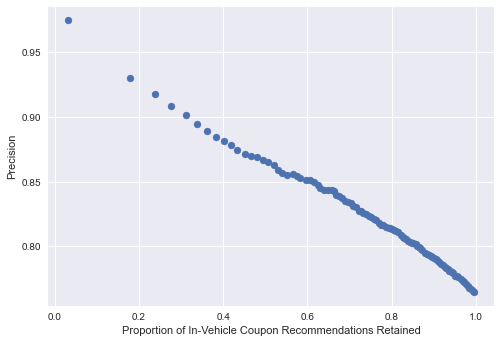

time: 72.1 ms (started: 2022-11-04 19:17:42 -07:00)


In [102]:
plt.scatter(data=df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results,
            x='row_count_percentage_in_vehicle_coupon_recommendation_retained_prediction_probability_boostrap_mean_confidence_interval_filtered', 
            y='precision')
plt.xlabel('Proportion of In-Vehicle Coupon Recommendations Retained')
plt.ylabel('Precision')

In [103]:
#recommending coupons to a smaller smaller percentage of our sample drivers yields a higher precision.

time: 201 µs (started: 2022-11-04 19:17:42 -07:00)


Text(0, 0.5, 'Precision')

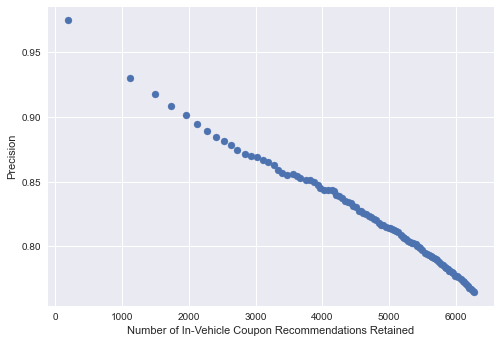

time: 71.9 ms (started: 2022-11-04 19:17:42 -07:00)


In [104]:
plt.scatter(data=df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results,
            x='row_count_prediction_probability_bootstrap_mean_confidence_interval_filtered_in_vehicle_coupon_recommendation_filtered', 
            y='precision')
plt.xlabel('Number of In-Vehicle Coupon Recommendations Retained')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

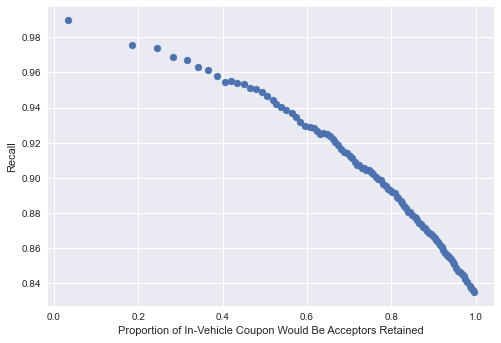

time: 81.4 ms (started: 2022-11-04 19:17:42 -07:00)


In [105]:
plt.scatter(data=df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results,
            x='row_count_percentage_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered', 
            y='recall')
plt.xlabel('Proportion of In-Vehicle Coupon Would Be Acceptors Retained')
plt.ylabel('Recall')

Text(0, 0.5, 'Recall')

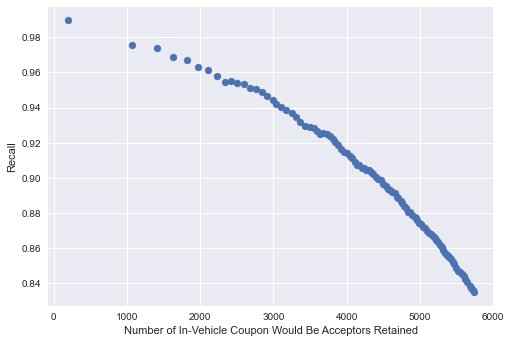

time: 74.9 ms (started: 2022-11-04 19:17:42 -07:00)


In [106]:
plt.scatter(data=df_prediction_probability_n_5_bootstrap_mean_confidence_interval_results,
            x='row_count_in_vehicle_coupon_accepted_retained_prediction_probability_bootstrap_mean_confidence_interval_filtered', 
            y='recall')
plt.xlabel('Number of In-Vehicle Coupon Would Be Acceptors Retained')
plt.ylabel('Recall')

In [107]:
#plot precision vs percentage of sample with data on

#but why do we care about the individuals who we don't want to recommend a coupon to???

time: 213 µs (started: 2022-11-04 19:17:43 -07:00)


In [108]:
#plot precision vs percentage of sample considered for in-vehicle coupon recommendation

time: 193 µs (started: 2022-11-04 19:17:43 -07:00)


## Get Gradient Boosting Classifier Stratified 5-Fold Grid Seach Cross Validation

In [109]:
#good split for gradient boosting classifier??? what does the learning curve say???

#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = models_readback
else:
    gradient_boosting_classifier = GradientBoostingClassifier(random_state=200)
    param_grid = {'n_estimators' : [5, 50, 250, 500],
                  'max_depth' : [1, 3, 5, 7, 9, None],
                  'learning_rate' : [0.01, 0.1, 1, 10, 100],
                  'max_features' : [None],
                  'max_leaf_nodes' : [None],
                  'n_iter_no_change' : [None]
                 }

    #https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = GridSearchCV(estimator=gradient_boosting_classifier, 
                                                                                               param_grid=param_grid, 
                                                                                               cv=StratifiedKFold_5_splits,
                                                                                               n_jobs=-1, 
                                                                                               verbose=0,
                                                                                               scoring=None,
                                                                                               pre_dispatch="2*n_jobs")

    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.fit(X=data_frame_collection['X_train'], 
                                                                                    y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                    groups=None)


    #save it
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                             filename=grid_search_models_filename_collection['gradient_boosting_classifier'],
                                                                                                             add_compressed_file=False)
    
stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=200), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9, None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'n_estimators': [5, 50, 250, 500],
                         'n_iter_no_change': [None]})

time: 19.3 ms (started: 2022-11-04 19:17:43 -07:00)


## Get Best Gradient Boosting Classifier by Score

In [110]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['gradient_boosting_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.build_datetime = datetime.datetime.now()    

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                                  filename=model_filename_collection['gradient_boosting_classifier'],
                                                                                                                  add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


This file already exists


GradientBoostingClassifier(max_depth=7, n_estimators=500, random_state=200)

time: 17.7 ms (started: 2022-11-04 19:17:43 -07:00)


## Best Gradient Boosting Classifier Stratified 5-Fold Cross Validation Scores

In [111]:
#cross validate for best parameters
data_collection_readback = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_results_filename_collection['gradient_boosting_classifier'])
if data_collection_readback != None:
    best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results = data_collection_readback
else:
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score), 
               'f1_score' : make_scorer(f1_score)}

    gradient_boosting_classifier = GradientBoostingClassifier(learning_rate = 0.1, 
                                                              max_depth = 9, 
                                                              n_estimators = 250,
                                                              random_state=200,
                                                              max_features=None,
                                                              verbose=0,
                                                              max_leaf_nodes=None,
                                                              warm_start=False,
                                                              n_iter_no_change=None)

    best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results = cross_validate(estimator=gradient_boosting_classifier, 
                                                                                                  X=data_frame_collection['X_train'], 
                                                                                                  y=data_frame_collection['Y_train'], 
                                                                                                  groups=None, 
                                                                                                  scoring=scoring, 
                                                                                                  cv=StratifiedKFold_5_splits, 
                                                                                                  n_jobs=None, verbose=0, 
                                                                                                  fit_params=None, 
                                                                                                  pre_dispatch='2*n_jobs', 
                                                                                                  return_train_score=False, 
                                                                                                  return_estimator=False, 
                                                                                                  error_score=np.nan)
    
    #save it
    best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results = icr.save_and_return_collection(best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results, 
                                                                                                                  filename=model_cross_validation_results_filename_collection['gradient_boosting_classifier'])
    
    
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier'] = best_gradient_boosting_classifier_stratified_5_fold_cross_validation_results
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']

This file already exists


{'fit_time': array([13.8757019 , 13.76643991, 13.95146704, 13.977916  , 13.98981881]),
 'score_time': array([0.02749801, 0.02689004, 0.03753495, 0.03438902, 0.02736783]),
 'test_accuracy': array([0.75862069, 0.7817734 , 0.76737309, 0.7545589 , 0.7757516 ]),
 'test_precision': array([0.76929326, 0.78938776, 0.7800659 , 0.77806122, 0.78589007]),
 'test_recall': array([0.82133565, 0.83940972, 0.82204861, 0.79427083, 0.83159722]),
 'test_f1_score': array([0.79446309, 0.81363063, 0.80050719, 0.78608247, 0.80809785])}

time: 5.53 ms (started: 2022-11-04 19:17:43 -07:00)


In [112]:
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_precision'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_precision'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_recall'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_recall'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_f1_score'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_f1_score'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_accuracy'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_accuracy'].mean()))



model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_precision'].mean(): 0.7805396417590763
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_recall'].mean(): 0.8217324070058784
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_f1_score'].mean(): 0.8005562444894216
model_stratified_5_fold_cross_validation_results_collection['best_gradient_boosting_classifier']['test_accuracy'].mean(): 0.7676155353288644
time: 1.14 ms (started: 2022-11-04 19:17:43 -07:00)


## Get Learning Curve for Best Gradient Boosting Clasifier

In [113]:
# #get learning curve

# data_frame_readback = icr.return_processed_collection_if_it_exists(filename=learning_curve_results_filename_collection['gradient_boosting_classifier'], parse_dates=False)

# if type(data_frame_readback) == type(pd.DataFrame({})):
#     df_learning_curve_results_best_gradient_boosting_classifier = data_frame_readback
# else:
#     best_gradient_boosting_classifier = GradientBoostingClassifier(learning_rate = 0.1, 
#                                                                    max_depth = 9, 
#                                                                    n_estimators = 250,
#                                                                    random_state=200,
#                                                                    max_features=None,
#                                                                    verbose=0,
#                                                                    max_leaf_nodes=None,
#                                                                    warm_start=False,
#                                                                    n_iter_no_change=None)

#     train_sizes_abs, train_scores_ndarray, test_scores_ndarray, fit_times_ndarray, score_times_ndarray = \
#     learning_curve(estimator=best_gradient_boosting_classifier,
#                    X=data_frame_collection['X_train'],
#                    y=data_frame_collection['Y_train'],
#                    train_sizes=np.linspace(0.1, 1.0, 5),
#                    cv=StratifiedKFold_5_splits,
#                    shuffle=False,
#                    verbose=0,
#                    scoring=None,
#                    random_state=200,
#                    return_times=True)


#     df_learning_curve_results_best_gradient_boosting_classifier = pd.DataFrame([train_sizes_abs, train_scores_ndarray, test_scores_ndarray, fit_times_ndarray, score_times_ndarray])
    
#     #save it
#     df_learning_curve_results_best_gradient_boosting_classifier = icr.save_and_return_collection(df_learning_curve_results_best_gradient_boosting_classifier, 
#                                                                                                  filename=learning_curve_results_filename_collection['gradient_boosting_classifier'])

# df_learning_curve_results_best_gradient_boosting_classifier


time: 949 µs (started: 2022-11-04 19:17:43 -07:00)


In [114]:
def plot_learning_curve(estimator, title, X, y, filename, axes=None, ylim=None, cv=None, n_jobs=None, scoring=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    
    learning_curve_raw = [train_sizes, train_scores, test_scores, fit_times,]
    learning_curve_mean_std = [train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std,]
    learning_curve_dictionary_raw_mean_std = {'learning_curve_raw':learning_curve_raw, 'learning_curve_mean_std':learning_curve_mean_std}
    learning_curve_model_name = icr.save_and_return_collection(learning_curve_dictionary_raw_mean_std, filename=filename)

    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,  alpha=0.1, color="r",)
    
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g",)
    
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    
    axes[0].legend(loc="best")
    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,  fit_times_mean + fit_times_std, alpha=0.1,)
    
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted, test_scores_mean_sorted - test_scores_std_sorted, test_scores_mean_sorted + test_scores_std_sorted, alpha=0.1,)
    
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt, learning_curve_model_name

time: 2.6 ms (started: 2022-11-04 19:17:43 -07:00)


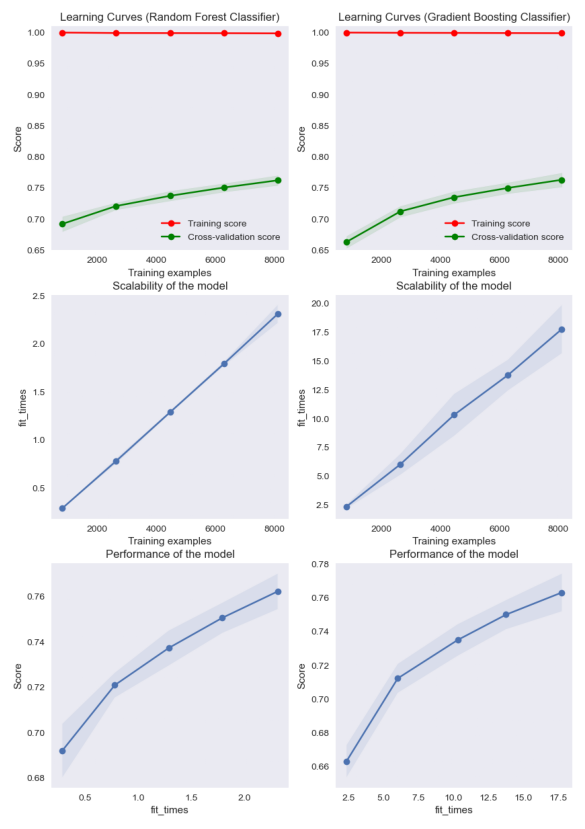

time: 145 ms (started: 2022-11-04 19:17:43 -07:00)


In [115]:
dpi=100
figure_filename = '../reports/figures/figure_train_size_score_random_forest_classifier_gradient_boosting_classifier_dpi' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(60, 15))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    title = "Learning Curves (Random Forest Classifier)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = RandomForestClassifier(bootstrap=False, 
                                       max_depth=25, 
                                       min_samples_split=4, 
                                       n_estimators=200,
                                       random_state=200,
                                       min_samples_leaf=1,
                                       max_features='auto',
                                       criterion='gini',
                                       warm_start='False',)

    plt, learning_curve_random_forest_classifier = plot_learning_curve(estimator, 
                                                                       title, 
                                                                       X=data_frame_collection['X_train'], 
                                                                       y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                       filename=learning_curve_results_filename_collection['random_forest_classifier'],
                                                                       axes=axes[:, 0], 
                                                                       ylim=(0.65, 1.01), 
                                                                       cv=cv, 
                                                                       n_jobs=4, 
                                                                       scoring="accuracy")
    

    title = r"Learning Curves (Gradient Boosting Classifier)"

    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                           max_depth = 9, 
                                           n_estimators = 250,
                                           random_state=200,
                                           max_features=None,
                                           verbose=0,
                                           max_leaf_nodes=None,
                                           warm_start=False,
                                           n_iter_no_change=None)

    plt, learning_curve_gradient_boosting_classifier = plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['gradient_boosting_classifier'],
                                                                           axes=axes[:, 1], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=cv, 
                                                                           n_jobs=4)

    
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [116]:
#BayesianOptimization vs GridSearchCV????

#https://stackoverflow.com/questions/59112006/setting-exact-number-of-iterations-for-logistic-regression-in-python

time: 218 µs (started: 2022-11-04 19:17:43 -07:00)


## Get Logistic Regression Classifier Stratified 5-Fold Grid Search Cross Validation

In [117]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['logistic_regression_classifier'],)
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = models_readback
else:
    param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                  'dual': [False],
                  'tol':[1e-4],
                  'C':[1.0],
                  'fit_intercept':[True],
                  'intercept_scaling':[1],
                  'class_weight':['balanced', None],
                  'random_state':[None],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter':[1, 10, 100, 1000],
                  'multi_class':['auto'],
                  'verbose':[0],
                  'warm_start':[False],
                  'n_jobs':[None],
                  'l1_ratio':[.3, .6, None],}

    logistic_regression_classifier = LogisticRegression(random_state=200)

    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = GridSearchCV(estimator=logistic_regression_classifier,
                                                                                                 param_grid=param_grid,
                                                                                                 refit=True,
                                                                                                 cv=StratifiedKFold_5_splits,
                                                                                                 verbose=3)

    # fitting the model for grid search
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'])
    
    stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(model=stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier,
                                                                                                              filename=grid_search_models_filename_collection['logistic_regression_classifier'])

stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier

This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=200),
             param_grid={'C': [1.0], 'class_weight': ['balanced', None],
                         'dual': [False], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'l1_ratio': [0.3, 0.6, None],
                         'max_iter': [1, 10, 100, 1000],
                         'multi_class': ['auto'], 'n_jobs': [None],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001], 'verbose': [0],
                         'warm_start': [False]},
             verbose=3)

time: 6.22 ms (started: 2022-11-04 19:17:43 -07:00)


## Get Best Stratified 5-Fold Logistic Regression Classifier

In [118]:

model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['logistic_regression_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier, 
                                                                                                                   filename=model_filename_collection['logistic_regression_classifier'],
                                                                                                                   add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_logistic_regression_classifier


This file already exists


LogisticRegression(l1_ratio=0.6, max_iter=10, penalty='none', solver='sag')

time: 3.24 ms (started: 2022-11-04 19:17:43 -07:00)


## Get Stratified 5-Fold Cross Validation Best Logistic Regression Classifier Results

In [119]:
data_collection_readback = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_results_filename_collection['logistic_regression_classifier'])
if data_collection_readback != None:
    model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'] = data_collection_readback
else:
    scoring = {'accuracy' : make_scorer(accuracy_score), 
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score), 
               'f1_score' : make_scorer(f1_score)}
    
    #clasifier
    best_logistic_regression_classifier = LogisticRegression(random_state=200)

    model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'] = cross_validate(estimator=best_logistic_regression_classifier,
                                                                                                                           X=data_frame_collection['X_train'],
                                                                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                                                           cv=StratifiedKFold_5_splits,
                                                                                                                           scoring=scoring,
                                                                                                                           return_train_score=False,
                                                                                                                           groups=None)
    #save it
    model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'] = icr.save_and_return_collection(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier'], 
                                                                                                              filename=model_cross_validation_results_filename_collection['logistic_regression_classifier'])


model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']



This file already exists


{'fit_time': array([0.05075598, 0.02951694, 0.03244805, 0.02993798, 0.0330379 ]),
 'score_time': array([0.00402117, 0.00390005, 0.00373101, 0.0037291 , 0.00401616]),
 'test_accuracy': array([0.68571429, 0.7       , 0.680138  , 0.67323805, 0.70280927]),
 'test_precision': array([0.70070148, 0.71428571, 0.69976172, 0.70057424, 0.72592593]),
 'test_recall': array([0.77970512, 0.78559028, 0.76475694, 0.74131944, 0.765625  ]),
 'test_f1_score': array([0.73809524, 0.74824308, 0.73081709, 0.72037115, 0.74524715])}

time: 4.42 ms (started: 2022-11-04 19:17:43 -07:00)


In [120]:
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_precision'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_precision'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_recall'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_recall'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_f1_score'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_f1_score'].mean()))
print("model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_accuracy'].mean(): " + str(model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_accuracy'].mean()))



model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_precision'].mean(): 0.7082498155888813
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_recall'].mean(): 0.767399356750506
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_f1_score'].mean(): 0.7365547403586596
model_stratified_5_fold_cross_validation_results_collection['best_logistic_regression_classifier']['test_accuracy'].mean(): 0.6883799197352671
time: 986 µs (started: 2022-11-04 19:17:43 -07:00)


In [121]:
# from sklearn.ensemble import AdaBoostClassifier


# ada_boost_classifier = AdaBoostClassifier(base_estimator=None, 
#                                           n_estimators=100, 
#                                           learning_rate=1.0, 
#                                           algorithm="SAMME.R",
#                                           random_state=200,)
# clf.fit(x=data_frame_collection['X_train'], y=data_frame_collection['y_train'])

# clf.predict([[0, 0, 0, 0]])

# clf.score(X, y)

time: 333 µs (started: 2022-11-04 19:17:43 -07:00)


In [122]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, 
#                            n_features=4,
#                            n_informative=2, 
#                            n_redundant=0,
#                            random_state=200, 
#                            shuffle=False)

# clf = AdaBoostClassifier(base_estimator=None, 
#                          n_estimators=100, 
#                          learning_rate=1.0, 
#                          algorithm="SAMME.R",
#                          random_state=200,)
# clf.fit(X, y)

# clf.predict([[0, 0, 0, 0]])

# clf.score(X, y)

time: 382 µs (started: 2022-11-04 19:17:43 -07:00)


In [123]:
#will later translate to make in-vehicle coupon recommendation yes or no, in the case the prediction was to recommend a coupon.



time: 207 µs (started: 2022-11-04 19:17:43 -07:00)


In [124]:
#random forest classifier variance reduction???

time: 172 µs (started: 2022-11-04 19:17:43 -07:00)


In [125]:
data_frame_collection['Y_train'].loc[:, 'Y'].value_counts()

1    5761
0    4386
Name: Y, dtype: int64

time: 2.21 ms (started: 2022-11-04 19:17:43 -07:00)


In [126]:
#random forest classifier overfitting???

# Every ML algorithm with high complexity can overfit. However, the OP is asking whether an RF will not overfit when increasing the number of trees in the forest.

# In general, ensemble methods reduces the prediction variance to almost nothing, improving the accuracy of the ensemble. If we define the variance of the expected generalization error of an individual randomized model as:



# From here, the variance of the expected generalization error of an ensemble corresponds to:



# where p(x) is the Pearson’s correlation coefficient between the predictions of two randomized models trained on the same data from two independent seeds. If we increase the number of DT's in the RF, larger M, the variance of the ensemble decreases when ρ(x)<1. Therefore, the variance of an ensemble is strictly smaller than the variance of an individual model.

# In a nutshell, increasing the number of individual randomized models in an ensemble will never increase the generalization error.

#https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit


time: 536 µs (started: 2022-11-04 19:17:43 -07:00)


In [127]:
#convert grid search stratified 5-fold cross validation results to data frame

#keys from stratified_5_fold_grid_search_cross_validation.cv_results_.keys()
random_forest_classifier_grid_search_stratified_cross_validation_results_dictionary_keys = ['param_bootstrap', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'mean_test_score', 'std_test_score', 'rank_test_score']

df_random_forest_classifier_grid_search_stratified_cross_validation_results = pd.DataFrame()
for key in random_forest_classifier_grid_search_stratified_cross_validation_results_dictionary_keys:
    
    df_random_forest_classifier_grid_search_stratified_cross_validation_results = \
    pd.concat([df_random_forest_classifier_grid_search_stratified_cross_validation_results,  pd.DataFrame(stratified_5_fold_grid_search_cross_validation.cv_results_[key])], axis=1)

df_random_forest_classifier_grid_search_stratified_cross_validation_results.columns = random_forest_classifier_grid_search_stratified_cross_validation_results_dictionary_keys
    
p(df_random_forest_classifier_grid_search_stratified_cross_validation_results)

NameError: name 'stratified_5_fold_grid_search_cross_validation' is not defined

time: 307 ms (started: 2022-11-04 19:17:43 -07:00)


In [ ]:
# #scatter plot of param_max_depth, param_min_samples_split, mean_test_score


# #get top 80 grid search stratified 5-fold cross validation results by accuracy
# df_random_forest_classifier_grid_search_stratified_cross_validation_results_top80 = \
# df_random_forest_classifier_grid_search_stratified_cross_validation_results.sort_values('mean_test_score', ascending=False)[0:80]
# p(df_random_forest_classifier_grid_search_stratified_cross_validation_results_top80)

# #plot scatter
# sns.set(rc={'figure.figsize':(15,12)})
# sns.scatterplot(data=df_random_forest_classifier_grid_search_stratified_cross_validation_results_top80, 
#                 x="param_max_depth", 
#                 y="param_min_samples_split", 
#                 hue="mean_test_score",
#                 s=300)

In [ ]:
#What percentage of random forest classifiers perform better with more trees vs less, i.e. 1000 vs 1200???


#sort columns of random forest classifier grid search stratitifed cross validation results
df_random_forest_classifier_grid_search_stratified_cross_validation_results = df_random_forest_classifier_grid_search_stratified_cross_validation_results.sort_values(['param_bootstrap', 'param_max_depth', 'param_min_samples_split', 
                                                                                         'param_n_estimators'])

#select columns
grid_search_results_select_columns = ['param_bootstrap', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'mean_test_score']
grid_search_results_groupby_columns = ['param_bootstrap', 'param_max_depth', 'param_min_samples_split']

mean_test_score_diff_result = df_random_forest_classifier_grid_search_stratified_cross_validation_results.loc[:, grid_search_results_select_columns].groupby(grid_search_results_groupby_columns).diff()

twelve000_classifier_high_accuracy_rate = mean_test_score_diff_result.loc[mean_test_score_diff_result.loc[:, 'mean_test_score'] > 0, :].shape[0] / mean_test_score_diff_result.shape[0] * 2
print('1200 classifiers has a higher classification accuracy than 1000 classifiers at a rate of ' + str(round(twelve000_classifier_high_accuracy_rate,3)))

one000_classifier_high_accuracy_rate = mean_test_score_diff_result.loc[mean_test_score_diff_result.loc[:, 'mean_test_score'] < 0, :].shape[0] / mean_test_score_diff_result.shape[0] * 2
print('1200 classifiers has a lower classification accuracy than 1000 classifiers at a rate of ' + str(round(one000_classifier_high_accuracy_rate,3)))

print('Therefore, more classifier is expected to performed better than less more often than not.')

In [ ]:
#adding more rows of data increase the max_depth????

In [ ]:
#get feature importants plot

plt.subplots(figsize=(5, 12))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:50].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top 50 Feature Importances');

plt.savefig('../reports/figures/figure_random_forest_classifier_top_50_feature_importances_v' + filename_version + '.png', bbox_inches='tight', dpi=600)



In [ ]:
column_name_list_random_forest_classifier_top_50_by_feature_importance = series_random_forest_classifier_feature_importances[0:50].index.to_list()

column_name_list_random_forest_classifier_top_25_by_feature_importance = series_random_forest_classifier_feature_importances[0:25].index.to_list()

pl(column_name_list_random_forest_classifier_top_50_by_feature_importance)

In [ ]:
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

In [ ]:

column_name_list_random_forest_classifier_top_50_by_feature_importance_target = column_name_list_random_forest_classifier_top_50_by_feature_importance + ['Y']
column_name_list_random_forest_classifier_top_25_by_feature_importance_target = column_name_list_random_forest_classifier_top_25_by_feature_importance + ['Y']
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance_target)

In [ ]:
df_train = pd.concat([data_frame_collection['X_train'], data_frame_collection['Y_train']], axis=1)
p(df_train)

In [ ]:
#correlation heatmap of top 50 features and target

df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance_target].corr() #correlation type??

fig, ax = plt.subplots(figsize=(30, 24))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 50 Features and Target', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_50_v' + filename_version + '.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#correlation heatmap of top 25 features and target

df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_25_by_feature_importance_target].corr() #correlation type??

fig, ax = plt.subplots(figsize=(15, 12))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 25 Features and Target', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_25_v' + filename_version + '.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#categories of top 25 features???

pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

#coupon_venue_type - coupon venue type

#temperature - outside temperature

#expiration - time til expiration

#CoffeeHouse - coffee house visits per month

In [ ]:
#correlation heatmap of top features

df_corr = data_frame_collection['X_train'].loc[:, column_name_list_random_forest_classifier_top_25_by_feature_importance].corr()

fig, ax = plt.subplots(figsize=(15, 12))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 25 Features', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_25_v' + filename_version + '.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#correlation heatmap of top features

df_corr = data_frame_collection['X_train'].loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance].corr()

fig, ax = plt.subplots(figsize=(35, 30))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 50 Features', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_50_v'+ filename_version +'.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#random forest classifier hyperparameters

#https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6

In [ ]:
#selecting number of base estimators, i.e. decision trees

#https://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred

In [ ]:
#min_samples_split vs min_samples_leaf

#https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre

In [ ]:
#how to show correlation for feature categories and boolean target variable???

#explain at the feature indicator level or the muli-category feature level???



In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = (predictions == test_labels.loc[:, 'Y']).value_counts('True')
    return accuracy

grid_accuracy = evaluate(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, data_frame_collection['X_train'], data_frame_collection['Y_train'])
grid_accuracy

In [ ]:
df_target_predicted = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict(data_frame_collection['X_train'])

(df_target_predicted == Y_train.loc[:, 'Y']).value_counts('True')

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_train, df_target_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
#alternative ML model: adaboost

#https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725





In [ ]:
#AUC ROC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,Y_train)



#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<font size="5"><a id='[Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Results]'>**Results**</a> </font>

In [ ]:
# grid_accuracy = evaluate(best_grid_cross_validation_random_forest_classifier, X_test, Y_test.loc[:, 'Y'])
# grid_accuracy

In [ ]:
# #get Y_test predicted and actual
# Y_test_predicted = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict(data_frame_collection['X_test'])
# Y_test_actual = data_frame_collection['Y_test'].loc[:, 'Y']


# #calculate recall score, precision score, and difference
# test_recall_score = recall_score(Y_test_actual, Y_test_predicted, average='binary')
# test_precision_score = precision_score(Y_test_actual, Y_test_predicted, average='binary')
# test_recall_score_test_precision_score_difference = (test_recall_score - test_precision_score)
# print('test_recall_score '+ str(round(test_recall_score, 5)) + ' is slightly better than test_precision_score ' + str(round(test_precision_score, 5)) + ' with difference of ' + str(round(test_recall_score_test_precision_score_difference, 5)) + '.')



In [ ]:
dir()

In [ ]:
# !conda install wordcloud

In [ ]:
# !pip install autoviz

In [ ]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# help(AV.AutoViz)

In [ ]:
# df = AV.AutoViz(os.path.join('..', 'data', 'raw', 'fraudTrain.csv'))

In [ ]:
# df = AV.AutoViz(os.path.join('..', 'data', 'raw', 'fraudTest.csv'))